## **Examen de certificación – Intento 3**

**Instrucciones para examen**

**Objetivo:** Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de deserción de clientes. Utilizaremos el «Customer Churn Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset**

El «Customer Churn Dataset» contiene datos de una compañía de telecomunicaciones que describen el comportamiento de los clientes y su tendencia a desertar (churn). La tarea es predecir si un cliente abandonará la compañía basándose en varias características demográficas y de uso del servicio.

**Diccionario de Datos:**

1. **customerID:** Un identificador único para cada cliente.
2. **gender:** El género del cliente (Male/Female).
3. **SeniorCitizen:** Indica si el cliente es una persona mayor (1) o no (0).
4. **Partner:** Indica si el cliente tiene pareja (Yes/No).
5. **Dependents:** Indica si el cliente tiene dependientes (Yes/No).
6. **tenure:** Número de meses que el cliente ha estado con la compañía.
7. **PhoneService:** Indica si el cliente tiene servicio telefónico (Yes/No).
8. **MultipleLines:** Indica si el cliente tiene múltiples líneas telefónicas (Yes/No/No phone service).
9. **InternetService:** Tipo de servicio de internet del cliente (DSL/Fiber optic/No).
10. **OnlineSecurity:** Indica si el cliente tiene seguridad en línea (Yes/No/No internet service).
11. **OnlineBackup:** Indica si el cliente tiene respaldo en línea (Yes/No/No internet service).
12. **DeviceProtection:** Indica si el cliente tiene protección de dispositivos (Yes/No/No internet service).
13. **TechSupport:** Indica si el cliente tiene soporte técnico (Yes/No/No internet service).
14. **StreamingTV:** Indica si el cliente tiene servicio de TV en streaming (Yes/No/No internet service).
15. **StreamingMovies:** Indica si el cliente tiene servicio de películas en streaming (Yes/No/No internet service).
16. **Contract:** Tipo de contrato del cliente (Month-to-month/One year/Two year).
17. **PaperlessBilling:** Indica si el cliente tiene facturación electrónica (Yes/No).
18. **PaymentMethod:** Método de pago del cliente (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)).
19. **MonthlyCharges:** Importe mensual que paga el cliente.
20. **TotalCharges:** Importe total pagado por el cliente.
21. **Churn:** Indica si el cliente ha abandonado la compañía (Yes/No).

**Requisitos**

**Limpieza de Datos:**
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [1]:
import pandas as pd
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re
import plotly.express as px
from IPython.display import HTML, Image
import utils
from collections import Counter
from scipy.stats import chi2_contingency

**Dataset**

In [2]:
# Carga los datasets
df = pd.read_csv('../data/customer_churn_dataset-training-master.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [5]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [6]:
# Renombrar las columnas eliminando los espacios
df.columns = df.columns.str.replace(' ', '_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage_Frequency    440832 non-null  float64
 5   Support_Calls      440832 non-null  float64
 6   Payment_Delay      440832 non-null  float64
 7   Subscription_Type  440832 non-null  object 
 8   Contract_Length    440832 non-null  object 
 9   Total_Spend        440832 non-null  float64
 10  Last_Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [8]:
df.shape

(440833, 12)

In [9]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Subscription_Type,Contract_Length,Total_Spend,Last_Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage_Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support_Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment_Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total_Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last_Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


**Observacion**
* La estructura de los 2 datasets no coinciden con la descrita en el el examen

* Utilizo la que esta en el examen, osea este archivo 'customer_churn_dataset-training-master.csv'

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage_Frequency    440832 non-null  float64
 5   Support_Calls      440832 non-null  float64
 6   Payment_Delay      440832 non-null  float64
 7   Subscription_Type  440832 non-null  object 
 8   Contract_Length    440832 non-null  object 
 9   Total_Spend        440832 non-null  float64
 10  Last_Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


**Limpieza de Datos:**
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.


In [12]:
df.head().T

,0,1,2,3,4
CustomerID,2.0,3.0,4.0,5.0,6.0
Age,30.0,65.0,55.0,58.0,23.0
Gender,Female,Female,Female,Male,Male
Tenure,39.0,49.0,14.0,38.0,32.0
Usage_Frequency,14.0,1.0,4.0,21.0,20.0
Support_Calls,5.0,10.0,6.0,7.0,5.0
Payment_Delay,18.0,8.0,18.0,7.0,8.0
Subscription_Type,Standard,Basic,Basic,Standard,Basic
Contract_Length,Annual,Monthly,Quarterly,Monthly,Monthly
Total_Spend,932.0,557.0,185.0,396.0,617.0


**Verificación y ajuste de tipos de datos:** Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [13]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


In [14]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
CustomerID,440832,1,0.0
Age,440832,1,0.0
Gender,440832,1,0.0
Tenure,440832,1,0.0
Usage_Frequency,440832,1,0.0
Support_Calls,440832,1,0.0
Payment_Delay,440832,1,0.0
Subscription_Type,440832,1,0.0
Contract_Length,440832,1,0.0
Total_Spend,440832,1,0.0


In [15]:
# Verificar si hay valores nulos en cada columna
nulos = df.isnull().sum()
print(nulos)


CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage_Frequency      1
Support_Calls        1
Payment_Delay        1
Subscription_Type    1
Contract_Length      1
Total_Spend          1
Last_Interaction     1
Churn                1
dtype: int64


In [16]:
# Eliminar filas con valores nulos en cualquier columna
df = df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage_Frequency    440832 non-null  float64
 5   Support_Calls      440832 non-null  float64
 6   Payment_Delay      440832 non-null  float64
 7   Subscription_Type  440832 non-null  object 
 8   Contract_Length    440832 non-null  object 
 9   Total_Spend        440832 non-null  float64
 10  Last_Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 43.7+ MB


In [18]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
CustomerID,440832,0,0.0
Age,440832,0,0.0
Gender,440832,0,0.0
Tenure,440832,0,0.0
Usage_Frequency,440832,0,0.0
Support_Calls,440832,0,0.0
Payment_Delay,440832,0,0.0
Subscription_Type,440832,0,0.0
Contract_Length,440832,0,0.0
Total_Spend,440832,0,0.0


In [19]:
# Ver los valores únicos en la columna 'Contract_Length'
print(df['Contract_Length'].unique())

['Annual' 'Monthly' 'Quarterly']


In [20]:
df['CustomerID'] = df['CustomerID'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Gender'] = df['Gender'].astype('category')
df['Tenure'] = df['Tenure'].astype('int')
df['Usage_Frequency'] = df['Usage_Frequency'].astype('int')
df['Support_Calls'] = df['Support_Calls'].astype('int')
df['Subscription_Type'] = df['Subscription_Type'].astype('category')
df['Contract_Length'] = df['Contract_Length'].astype('category')
df['Total_Spend'] = df['Total_Spend'].astype('float64')
df['Last_Interaction'] = pd.to_datetime(df['Last_Interaction'], errors='coerce')
df['Churn'] = df['Churn'].astype('int')


**Detección y eliminación de valores duplicados** 

In [21]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


**Consistencia en valores categóricos**

In [22]:
# Identificar columnas de tipo 'object', típicamente usadas para variables categóricas
categorical_columns = df.select_dtypes(include=['category','bool']).columns
# Crear un diccionario donde cada clave es el nombre de la columna y los valores son los valores únicos de esa columna
unique_values_dict = {col: df[col].unique() for col in categorical_columns}
# Convertir el diccionario en un DataFrame, rellenando con NaN cuando haya menos valores únicos
unique_values_df = pd.DataFrame.from_dict(unique_values_dict, orient='index').transpose()
# Mostrar el DataFrame resultante
unique_values_df.T

,0,1,2
Gender,Female,Male,None
Subscription_Type,Standard,Basic,Premium
Contract_Length,Annual,Monthly,Quarterly


**Manejo de valores faltantes:**

In [23]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
CustomerID,440832,0,0.0
Age,440832,0,0.0
Gender,440832,0,0.0
Tenure,440832,0,0.0
Usage_Frequency,440832,0,0.0
Support_Calls,440832,0,0.0
Payment_Delay,440832,0,0.0
Subscription_Type,440832,0,0.0
Contract_Length,440832,0,0.0
Total_Spend,440832,0,0.0


In [24]:
df.Total_Spend.describe()

count    440832.000000
mean        631.616223
std         240.803001
min         100.000000
25%         480.000000
50%         661.000000
75%         830.000000
max        1000.000000
Name: Total_Spend, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         440832 non-null  int32         
 1   Age                440832 non-null  int32         
 2   Gender             440832 non-null  category      
 3   Tenure             440832 non-null  int32         
 4   Usage_Frequency    440832 non-null  int32         
 5   Support_Calls      440832 non-null  int32         
 6   Payment_Delay      440832 non-null  float64       
 7   Subscription_Type  440832 non-null  category      
 8   Contract_Length    440832 non-null  category      
 9   Total_Spend        440832 non-null  float64       
 10  Last_Interaction   440832 non-null  datetime64[ns]
 11  Churn              440832 non-null  int32         
dtypes: category(3), datetime64[ns](1), float64(2), int32(6)
memory usage: 24.8 MB


In [26]:
#Lista de columnas categóricas a revisar
categorical_cols = ['Gender','Subscription_Type','Contract_Length'  ]
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON
ruta_json = '../data/valores_unicos_iniciales.json'
# Guardar el diccionario en un archivo JSON
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json}'")



Valores únicos en la columna 'Gender':
['Female', 'Male']

Valores únicos en la columna 'Subscription_Type':
['Standard', 'Basic', 'Premium']

Valores únicos en la columna 'Contract_Length':
['Annual', 'Monthly', 'Quarterly']

Valores únicos guardados en '../data/valores_unicos_iniciales.json'


In [27]:
def limpiar_cadena(cadena):
    """
    Limpia una cadena de texto realizando las siguientes operaciones:
    1. Convierte todo el texto a minúsculas.
    2. Elimina caracteres no imprimibles antes de la primera letra y después de la última letra,
       pero mantiene los caracteres internos.
    
    Parámetros:
    - cadena (str): La cadena de texto a limpiar.
    
    Retorna:
    - str: La cadena limpia.
    """
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena


# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)
# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())



Valores únicos después de limpieza en 'Gender':
['female', 'male']
Categories (2, object): ['female', 'male']

Valores únicos después de limpieza en 'Subscription_Type':
['standard', 'basic', 'premium']
Categories (3, object): ['basic', 'premium', 'standard']

Valores únicos después de limpieza en 'Contract_Length':
['annual', 'monthly', 'quarterly']
Categories (3, object): ['annual', 'monthly', 'quarterly']


In [28]:
# Guardar los valores únicos en un archivo JSON para referencia
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos[col] = unique_vals
# Guardar en 'valores_unicos.json'
with open('../data/valores_unicos_finales.json', 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print("Valores únicos guardados en 'valores_unicos.json'.")

Valores únicos guardados en 'valores_unicos.json'.


**Manejo de valores faltantes adecuadamente:**
* Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [29]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
CustomerID,440832,0,0.0
Age,440832,0,0.0
Gender,440832,0,0.0
Tenure,440832,0,0.0
Usage_Frequency,440832,0,0.0
Support_Calls,440832,0,0.0
Payment_Delay,440832,0,0.0
Subscription_Type,440832,0,0.0
Contract_Length,440832,0,0.0
Total_Spend,440832,0,0.0


In [30]:
df.Total_Spend.unique()

array([932.  , 557.  , 185.  , ..., 829.59, 804.3 , 959.47])

In [31]:
# Reemplazar espacios vacíos en 'TotalCharges' con NaN
df['Total_Spend'] = df['Total_Spend'].replace(" ", np.nan)
# Convertir la columna a float64
df['Total_Spend'] = df['Total_Spend'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         440832 non-null  int32         
 1   Age                440832 non-null  int32         
 2   Gender             440832 non-null  category      
 3   Tenure             440832 non-null  int32         
 4   Usage_Frequency    440832 non-null  int32         
 5   Support_Calls      440832 non-null  int32         
 6   Payment_Delay      440832 non-null  float64       
 7   Subscription_Type  440832 non-null  category      
 8   Contract_Length    440832 non-null  category      
 9   Total_Spend        440832 non-null  float64       
 10  Last_Interaction   440832 non-null  datetime64[ns]
 11  Churn              440832 non-null  int32         
dtypes: category(3), datetime64[ns](1), float64(2), int32(6)
memory usage: 24.8 MB


### **Detección de datos anómalos:**

Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un salario anual de 1 millón de dólares para un puesto de entrada).

In [32]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
CustomerID,0.0,0.0,2.0,449999.0
Age,0.0,0.0,18.0,65.0
Tenure,0.0,0.0,1.0,60.0
Usage_Frequency,0.0,0.0,1.0,30.0
Support_Calls,0.0,0.0,0.0,10.0
Payment_Delay,0.0,0.0,0.0,30.0
Total_Spend,0.0,0.0,100.0,1000.0
Churn,0.0,0.0,0.0,1.0


In [33]:
df[numerical_columns].describe()

,CustomerID,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,1.000000


**Exploración de Datos:**

**Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

**Visualización 1**

**Hipótesis extraída**

La mayoría de los clientes son relativamente nuevos y tienen un gasto moderado, aunque existe una importante variabilidad en la frecuencia de uso y gasto.

**Análisis descriptivo que la justifica**

Como podemos ver en el análisis de antigüedad, la mayoría de los clientes tienen entre 1 y 60 meses con la empresa, con una concentración notable en aquellos con menos de 2 años. Esto sugiere que un alto porcentaje de clientes son relativamente nuevos (con una media de 31 meses de antigüedad). En base a esto, podríamos crear categorías de antigüedad más refinadas, como:

* Recién adquiridos: 0 a 6 meses
* Nuevos: 7 a 12 meses
* Relativamente nuevos: 13 a 24 meses
* Estables: 25 a 36 meses
* Consolidados: Más de 36 meses

En cuanto a la frecuencia de uso, la mayoría de los clientes utilizan el servicio con una frecuencia media de aproximadamente 16 veces al mes. Sin embargo, la distribución muestra una amplia variabilidad, lo que indica que algunos clientes usan mucho más el servicio que otros. Esto podría influir en los cargos mensuales, que tienden a ser bajos, pero también muestran un leve aumento para los clientes que usan más frecuentemente el servicio.

Los cargos mensuales tienen una distribución que se concentra en valores bajos (menores a 25 USD), pero también hay una ligera frecuencia de valores mayores a 40 USD. Esto puede reflejar la diversidad de comportamientos de los clientes y su nivel de uso del servicio. Sería útil agrupar estos cargos en categorías que correspondan a diferentes niveles de uso.

En cuanto al gasto total, existe un sesgo hacia valores bajos, lo que concuerda con la presencia de muchos clientes relativamente nuevos, que suelen tener un gasto menor. Sin embargo, hay clientes que han estado más tiempo y podrían tener un gasto mayor, lo que indica una relación más estable con la compañía.

PD: Los rangos finales de las agrupaciones podrían definirse también en función de otras variables de interés, como la frecuencia de uso o la cantidad de llamadas al soporte, para analizar el impacto de estos factores en el gasto total y la retención de clientes.

          CustomerID            Age         Tenure  Usage_Frequency  \
count  440832.000000  440832.000000  440832.000000    440832.000000   
mean   225398.667955      39.373153      31.256336        15.807494   
std    129531.918550      12.442369      17.255727         8.586242   
min         2.000000      18.000000       1.000000         1.000000   
25%    113621.750000      29.000000      16.000000         9.000000   
50%    226125.500000      39.000000      32.000000        16.000000   
75%    337739.250000      48.000000      46.000000        23.000000   
max    449999.000000      65.000000      60.000000        30.000000   

       Support_Calls  Payment_Delay    Total_Spend          Churn  
count  440832.000000  440832.000000  440832.000000  440832.000000  
mean        3.604437      12.965722     631.616223       0.567107  
std         3.070218       8.258063     240.803001       0.495477  
min         0.000000       0.000000     100.000000       0.000000  
25%         1.000000

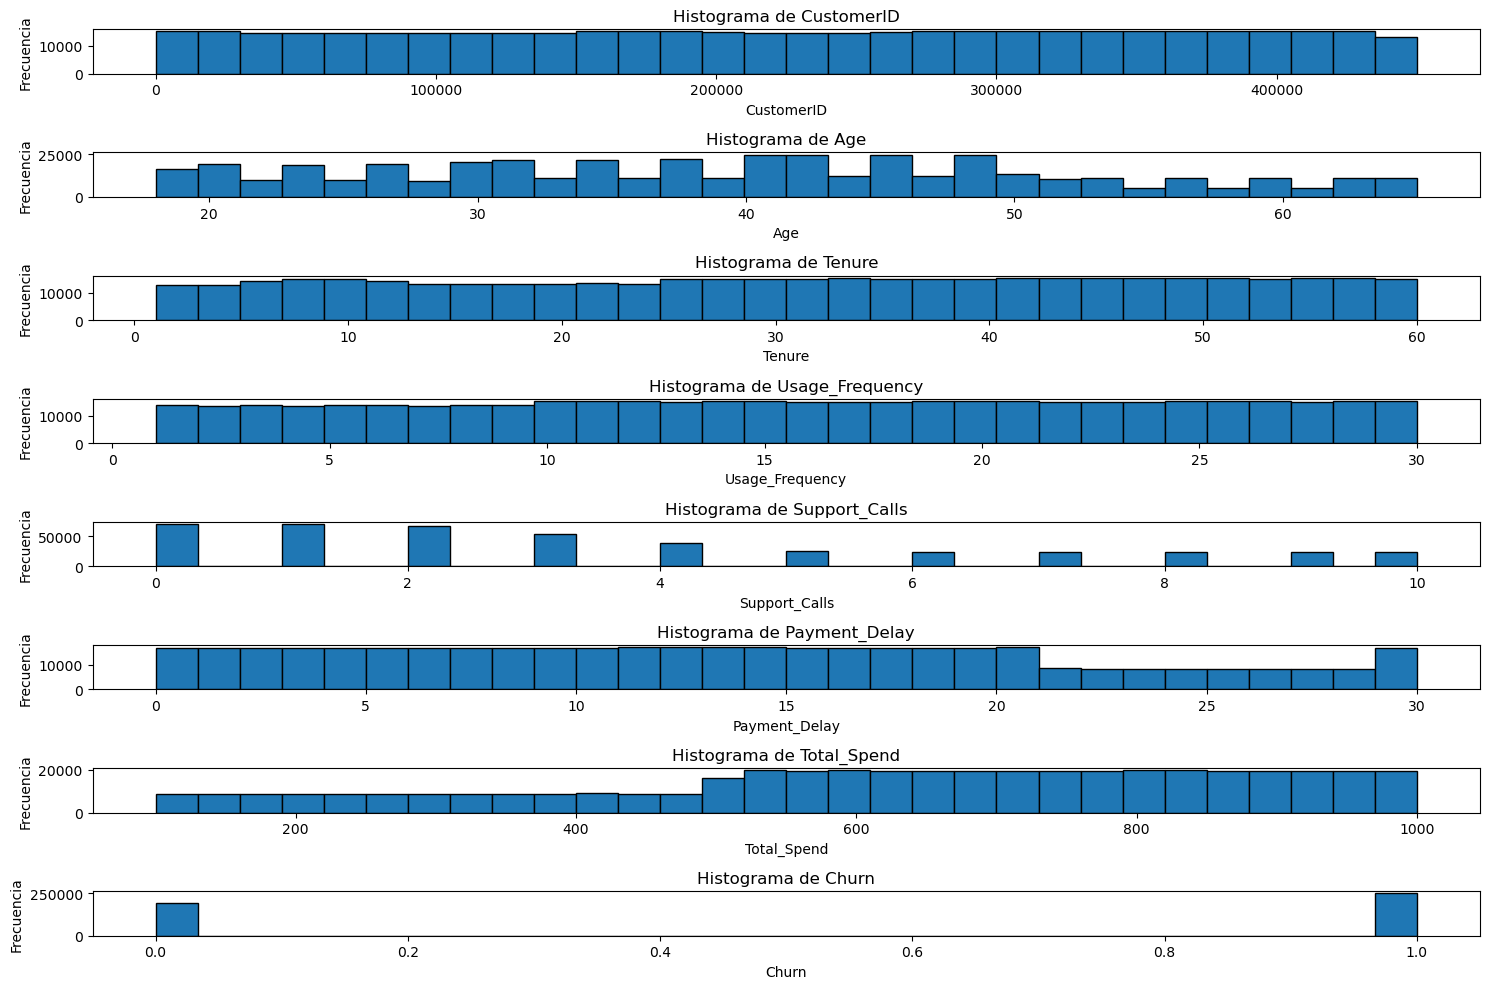

In [34]:
print(df[numerical_columns].describe())

# Configuración del tamaño de la gráfica
plt.figure(figsize=(15, 10))

# Crear un histograma para cada columna numérica
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.hist(df[column].dropna(), bins=30, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**1 - Contratos de largo plazo vs. contratos mes a mes**

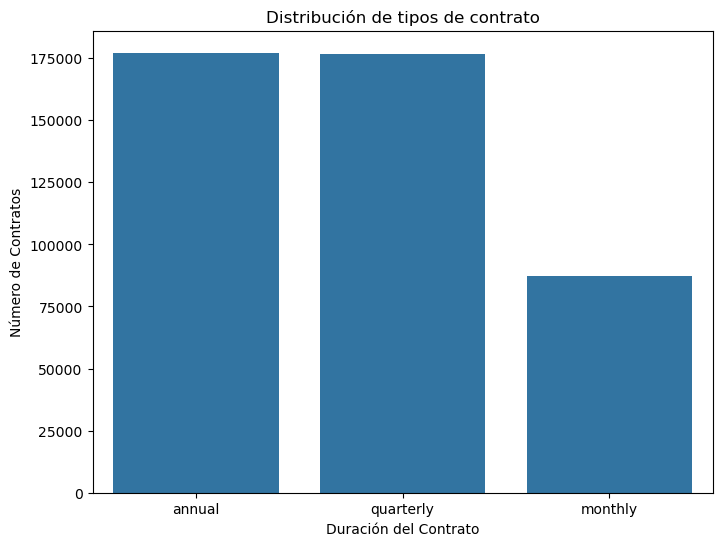

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de tipos de contrato
contract_count = df['Contract_Length'].value_counts()

# Configuración del gráfico
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract_Length', order=contract_count.index)
plt.title('Distribución de tipos de contrato')
plt.xlabel('Duración del Contrato')
plt.ylabel('Número de Contratos')
plt.show()


**2 - Ciudadanos senior (clientes de edad avanzada)**

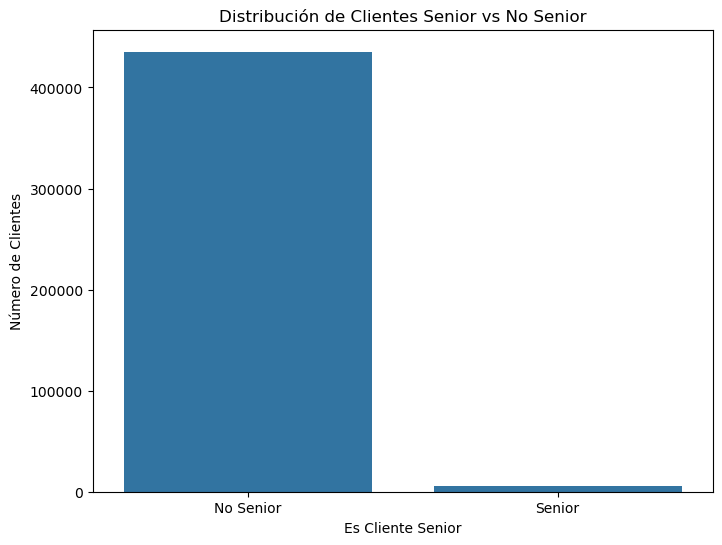

In [36]:
# Definir el umbral para considerar "senior citizen" (mayores de 65 años)
age_threshold = 65

# Crear una nueva columna booleana que indique si el cliente es senior
df['Is_Senior'] = df['Age'] >= age_threshold

# Graficar la distribución de clientes senior vs no senior
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Is_Senior')
plt.title('Distribución de Clientes Senior vs No Senior')
plt.xlabel('Es Cliente Senior')
plt.ylabel('Número de Clientes')
plt.xticks([0, 1], ['No Senior', 'Senior'])
plt.show()


**OBservacion**
* Gráfico 1: Muestra la distribución de los tipos de contrato (mensual frente a largo plazo).
* Gráfico 2: Muestra la cantidad de clientes que son "senior citizens" (mayores de 65 años) frente a los que no lo son.

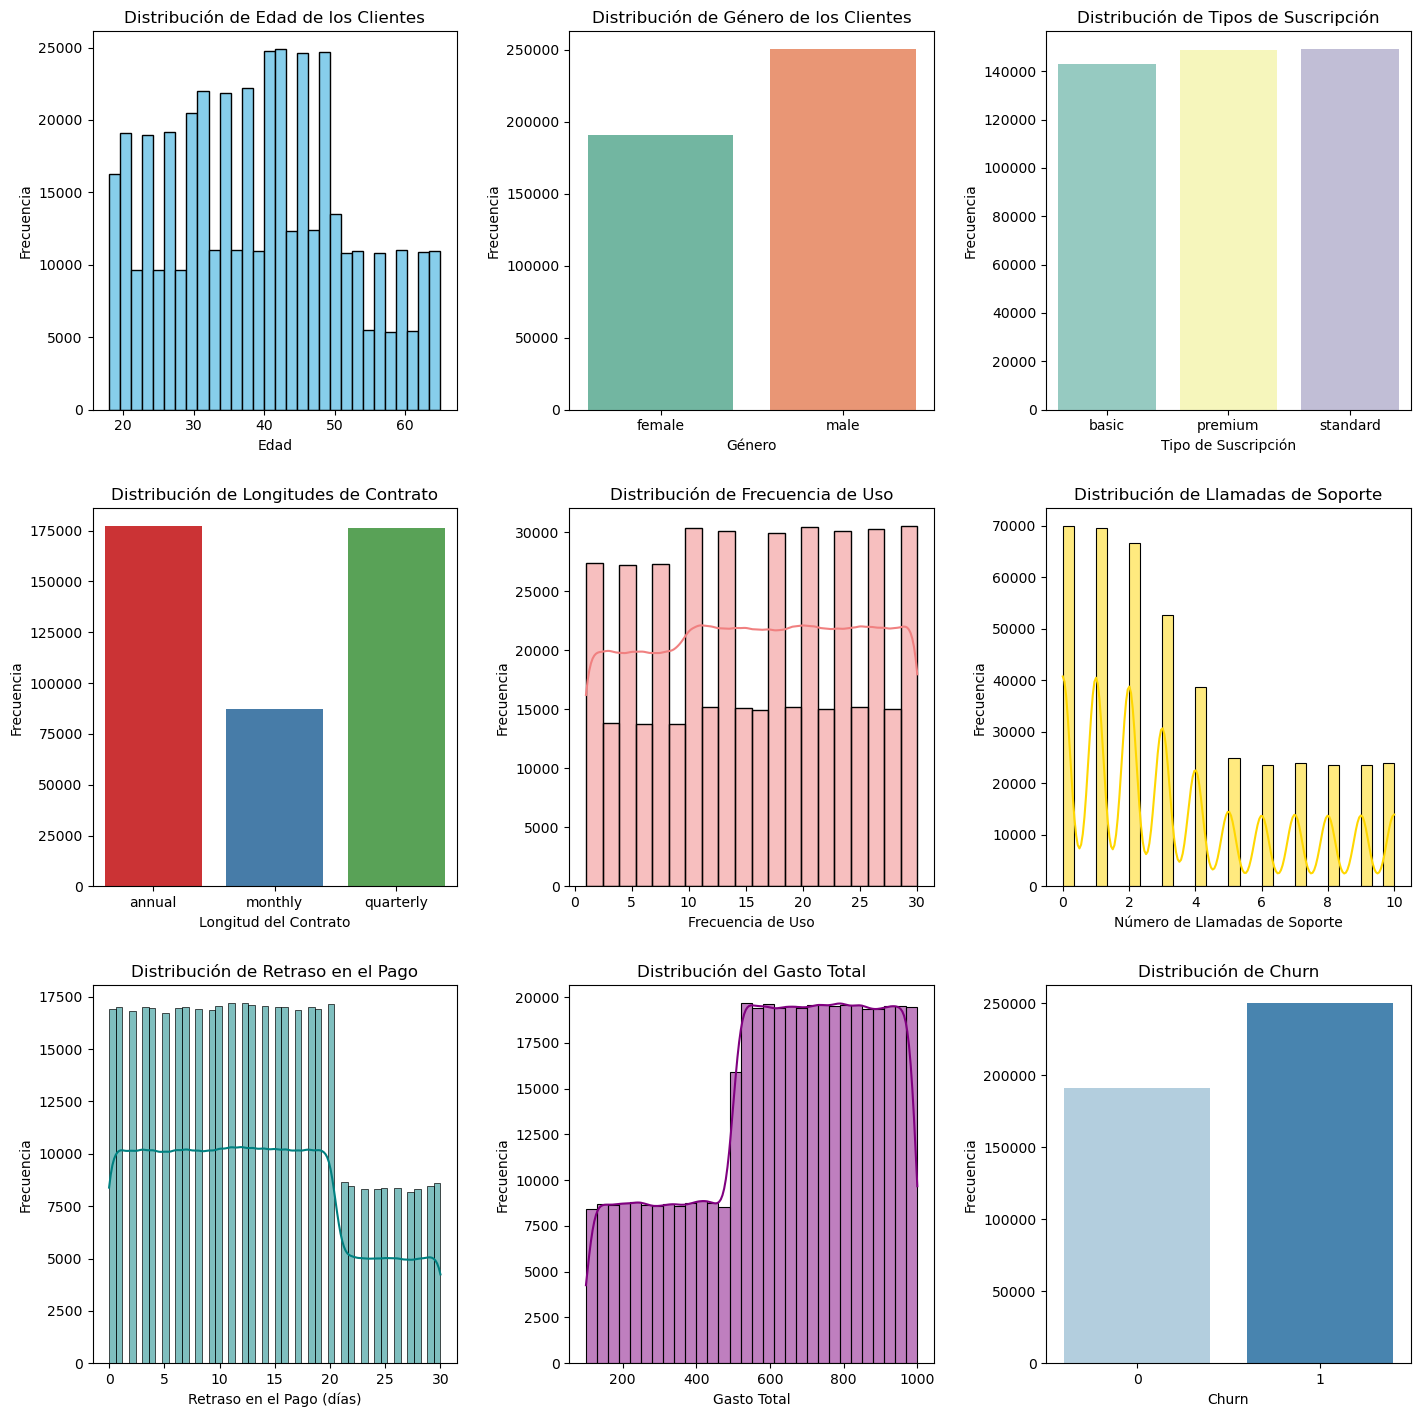

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear la figura con 3 filas y 3 columnas de subgráficos
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Gráfico 1: Distribución de la Edad (Histograma)
axes[0, 0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribución de Edad de los Clientes')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Frecuencia')

# Gráfico 2: Distribución del Género (Barras)
sns.countplot(x='Gender', data=df, ax=axes[0, 1], hue='Gender', palette='Set2', legend=False)
axes[0, 1].set_title('Distribución de Género de los Clientes')
axes[0, 1].set_xlabel('Género')
axes[0, 1].set_ylabel('Frecuencia')

# Gráfico 3: Distribución del Tipo de Suscripción (Barras)
sns.countplot(x='Subscription_Type', data=df, ax=axes[0, 2], hue='Subscription_Type', palette='Set3', legend=False)
axes[0, 2].set_title('Distribución de Tipos de Suscripción')
axes[0, 2].set_xlabel('Tipo de Suscripción')
axes[0, 2].set_ylabel('Frecuencia')

# Gráfico 4: Distribución de la Longitud del Contrato (Barras)
sns.countplot(x='Contract_Length', data=df, ax=axes[1, 0], hue='Contract_Length', palette='Set1', legend=False)
axes[1, 0].set_title('Distribución de Longitudes de Contrato')
axes[1, 0].set_xlabel('Longitud del Contrato')
axes[1, 0].set_ylabel('Frecuencia')

# Gráfico 5: Distribución de la Frecuencia de Uso (Histograma)
sns.histplot(df['Usage_Frequency'], kde=True, bins=20, ax=axes[1, 1], color='lightcoral')
axes[1, 1].set_title('Distribución de Frecuencia de Uso')
axes[1, 1].set_xlabel('Frecuencia de Uso')
axes[1, 1].set_ylabel('Frecuencia')

# Gráfico 6: Distribución de las Llamadas de Soporte (Histograma)
sns.histplot(df['Support_Calls'], kde=True, bins=30, ax=axes[1, 2], color='gold')
axes[1, 2].set_title('Distribución de Llamadas de Soporte')
axes[1, 2].set_xlabel('Número de Llamadas de Soporte')
axes[1, 2].set_ylabel('Frecuencia')

# Gráfico 7: Distribución del Retraso en el Pago (Histograma)
sns.histplot(df['Payment_Delay'], kde=True, bins=50, ax=axes[2, 0], color='teal')
axes[2, 0].set_title('Distribución de Retraso en el Pago')
axes[2, 0].set_xlabel('Retraso en el Pago (días)')
axes[2, 0].set_ylabel('Frecuencia')

# Gráfico 8: Distribución del Gasto Total (Histograma)
sns.histplot(df['Total_Spend'], kde=True, bins=30, ax=axes[2, 1], color='purple')
axes[2, 1].set_title('Distribución del Gasto Total')
axes[2, 1].set_xlabel('Gasto Total')
axes[2, 1].set_ylabel('Frecuencia')

# Gráfico 9: Distribución del Churn (Barras)
sns.countplot(x='Churn', data=df, ax=axes[2, 2], hue='Churn', palette='Blues', legend=False)
axes[2, 2].set_title('Distribución de Churn')
axes[2, 2].set_xlabel('Churn')
axes[2, 2].set_ylabel('Frecuencia')

# Mostrar la figura con todos los gráficos
plt.show()


## **Observación**
* **Distribución de Edad de los Clientes (Histograma):** Este gráfico muestra cómo se distribuyen las edades de los clientes. Nos ayuda a ver si hay una edad predominante, lo que es clave para dirigir campañas de marketing específicas.

* **Distribución de Género de los Clientes (Gráfico de barras):** Este gráfico nos muestra cuántos clientes son hombres y cuántas mujeres. Conocer esta información es útil para entender la diversidad de género y crear productos o promociones que resuenen con cada grupo.

* **Distribución de Tipos de Suscripción (Gráfico de barras):** Aquí vemos qué tipo de suscripción prefieren los clientes. Esto ayuda a saber cuáles son los planes más populares y ajustar las ofertas para satisfacer mejor sus necesidades.

* **Distribución de Longitudes de Contrato (Gráfico de barras):** Este gráfico nos permite ver si los clientes prefieren contratos cortos o largos. Esta información es útil para tomar decisiones sobre precios y estrategias de retención.

* **Distribución de Frecuencia de Uso (Histograma con densidad - KDE):** Muestra con qué frecuencia los clientes usan el servicio. Esto nos ayuda a identificar si la mayoría son usuarios frecuentes o esporádicos, y nos guía para crear estrategias de fidelización.

* **Distribución de Llamadas de Soporte (Histograma con densidad - KDE):** Este gráfico revela cuántas veces los clientes contactan al soporte. Nos permite detectar problemas recurrentes y mejorar la atención al cliente.

* **Distribución de Retraso en el Pago (Histograma con densidad - KDE):** Muestra cómo se distribuyen los retrasos en los pagos. Nos ayuda a identificar qué tan grandes son los retrasos y cuántos clientes están afectados, lo cual es útil para mejorar las políticas de cobranza.

* **Distribución del Gasto Total (Histograma con densidad - KDE):** Este gráfico nos permite ver cómo se distribuyen los gastos entre los clientes. Nos ayuda a identificar si los clientes de mayor gasto están en un grupo pequeño o si hay una distribución más pareja.

* **Distribución de Churn (Abandono de Servicio) (Gráfico de barras):** Muestra cuántos clientes han dejado de usar el servicio. Esta información es crucial para entender la tasa de retención y ajustar las estrategias para reducir el abandono.

### **Visualizaciones exploratorias multivariadas**

Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

Churn                         0              1
CustomerID count  190833.000000  249999.000000
           mean   349841.428144  130407.146969
           std     63469.694263   75277.512005
           min       144.000000       2.000000
           25%    304822.000000   65231.500000
...                         ...            ...
Churn      min         0.000000       1.000000
           25%         0.000000       1.000000
           50%         0.000000       1.000000
           75%         0.000000       1.000000
           max         0.000000       1.000000

[64 rows x 2 columns]


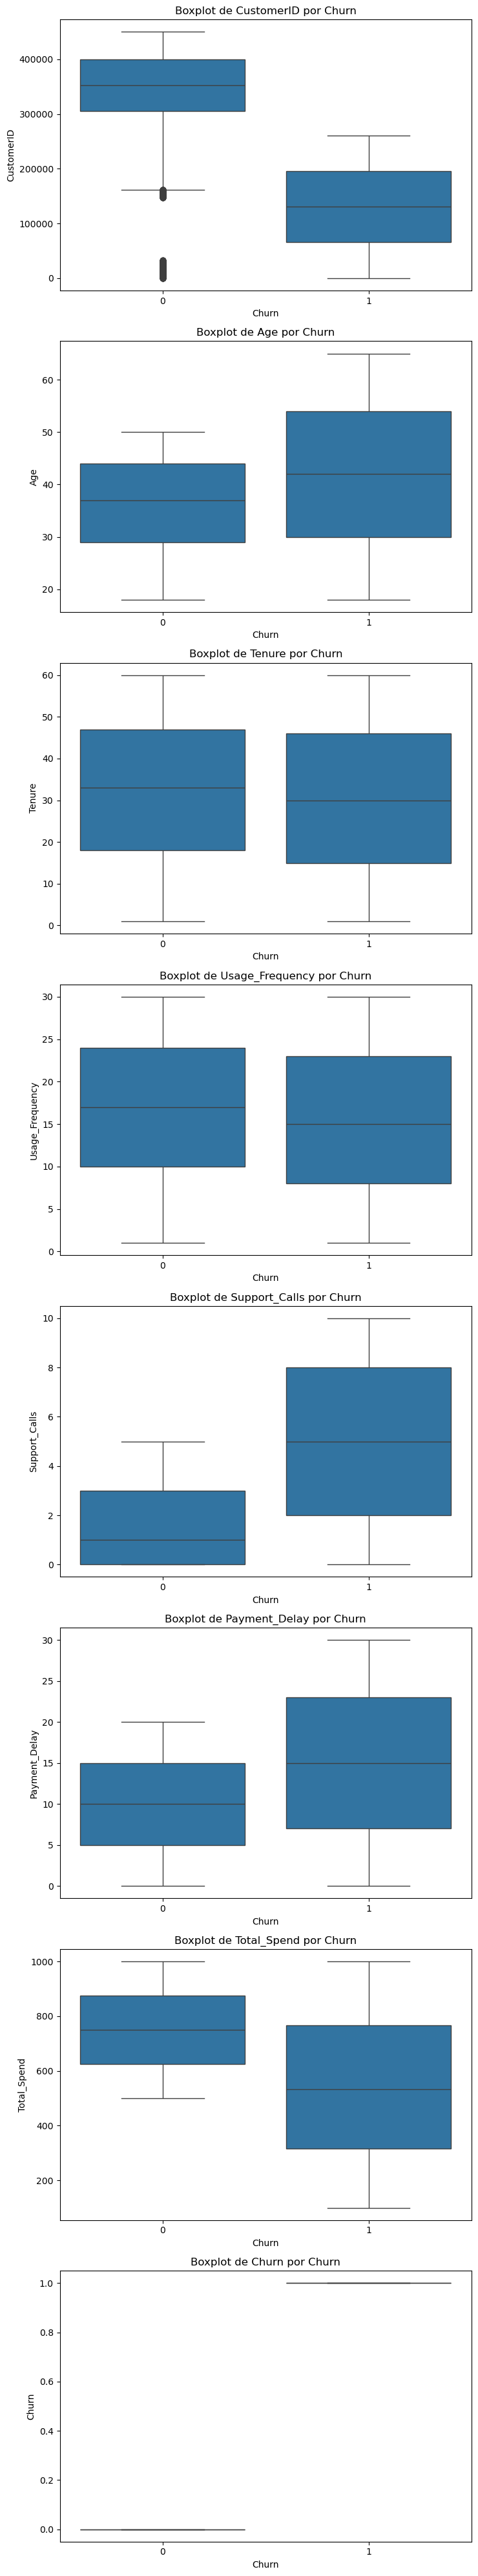

In [38]:
print(df.groupby(['Churn'])[numerical_columns].describe().T)
# Configuración del tamaño de la gráfica
plt.figure(figsize=(7.5, 5 * len(numerical_columns)))
# Crear un boxplot para cada columna numérica segmentada por 'Churn'
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f'Boxplot de {column} por Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

## **Observacion**
* Los gráficos boxplot muestran las diferencias clave entre los clientes que han abandonado el servicio y aquellos que se han quedado. Los clientes que se quedan tienden a tener una mayor duración en el servicio, con un tiempo de permanencia más largo y un mayor total acumulado en cargos. Esto sugiere que estos clientes continúan generando ingresos a lo largo del tiempo, lo que refleja una relación más estable con la empresa.

* Por otro lado, los clientes que abandonan el servicio tienen un tiempo de permanencia más corto y un total de cargos más bajo. Aunque sus cargos mensuales promedio son algo más altos, la variabilidad de estos cargos es menor, lo que indica que probablemente optan por planes más caros pero por un tiempo limitado. Estos patrones ofrecen información valiosa para entender las razones del abandono y pueden ser utilizados para crear estrategias de retención más enfocadas y ajustar las ofertas de precios.

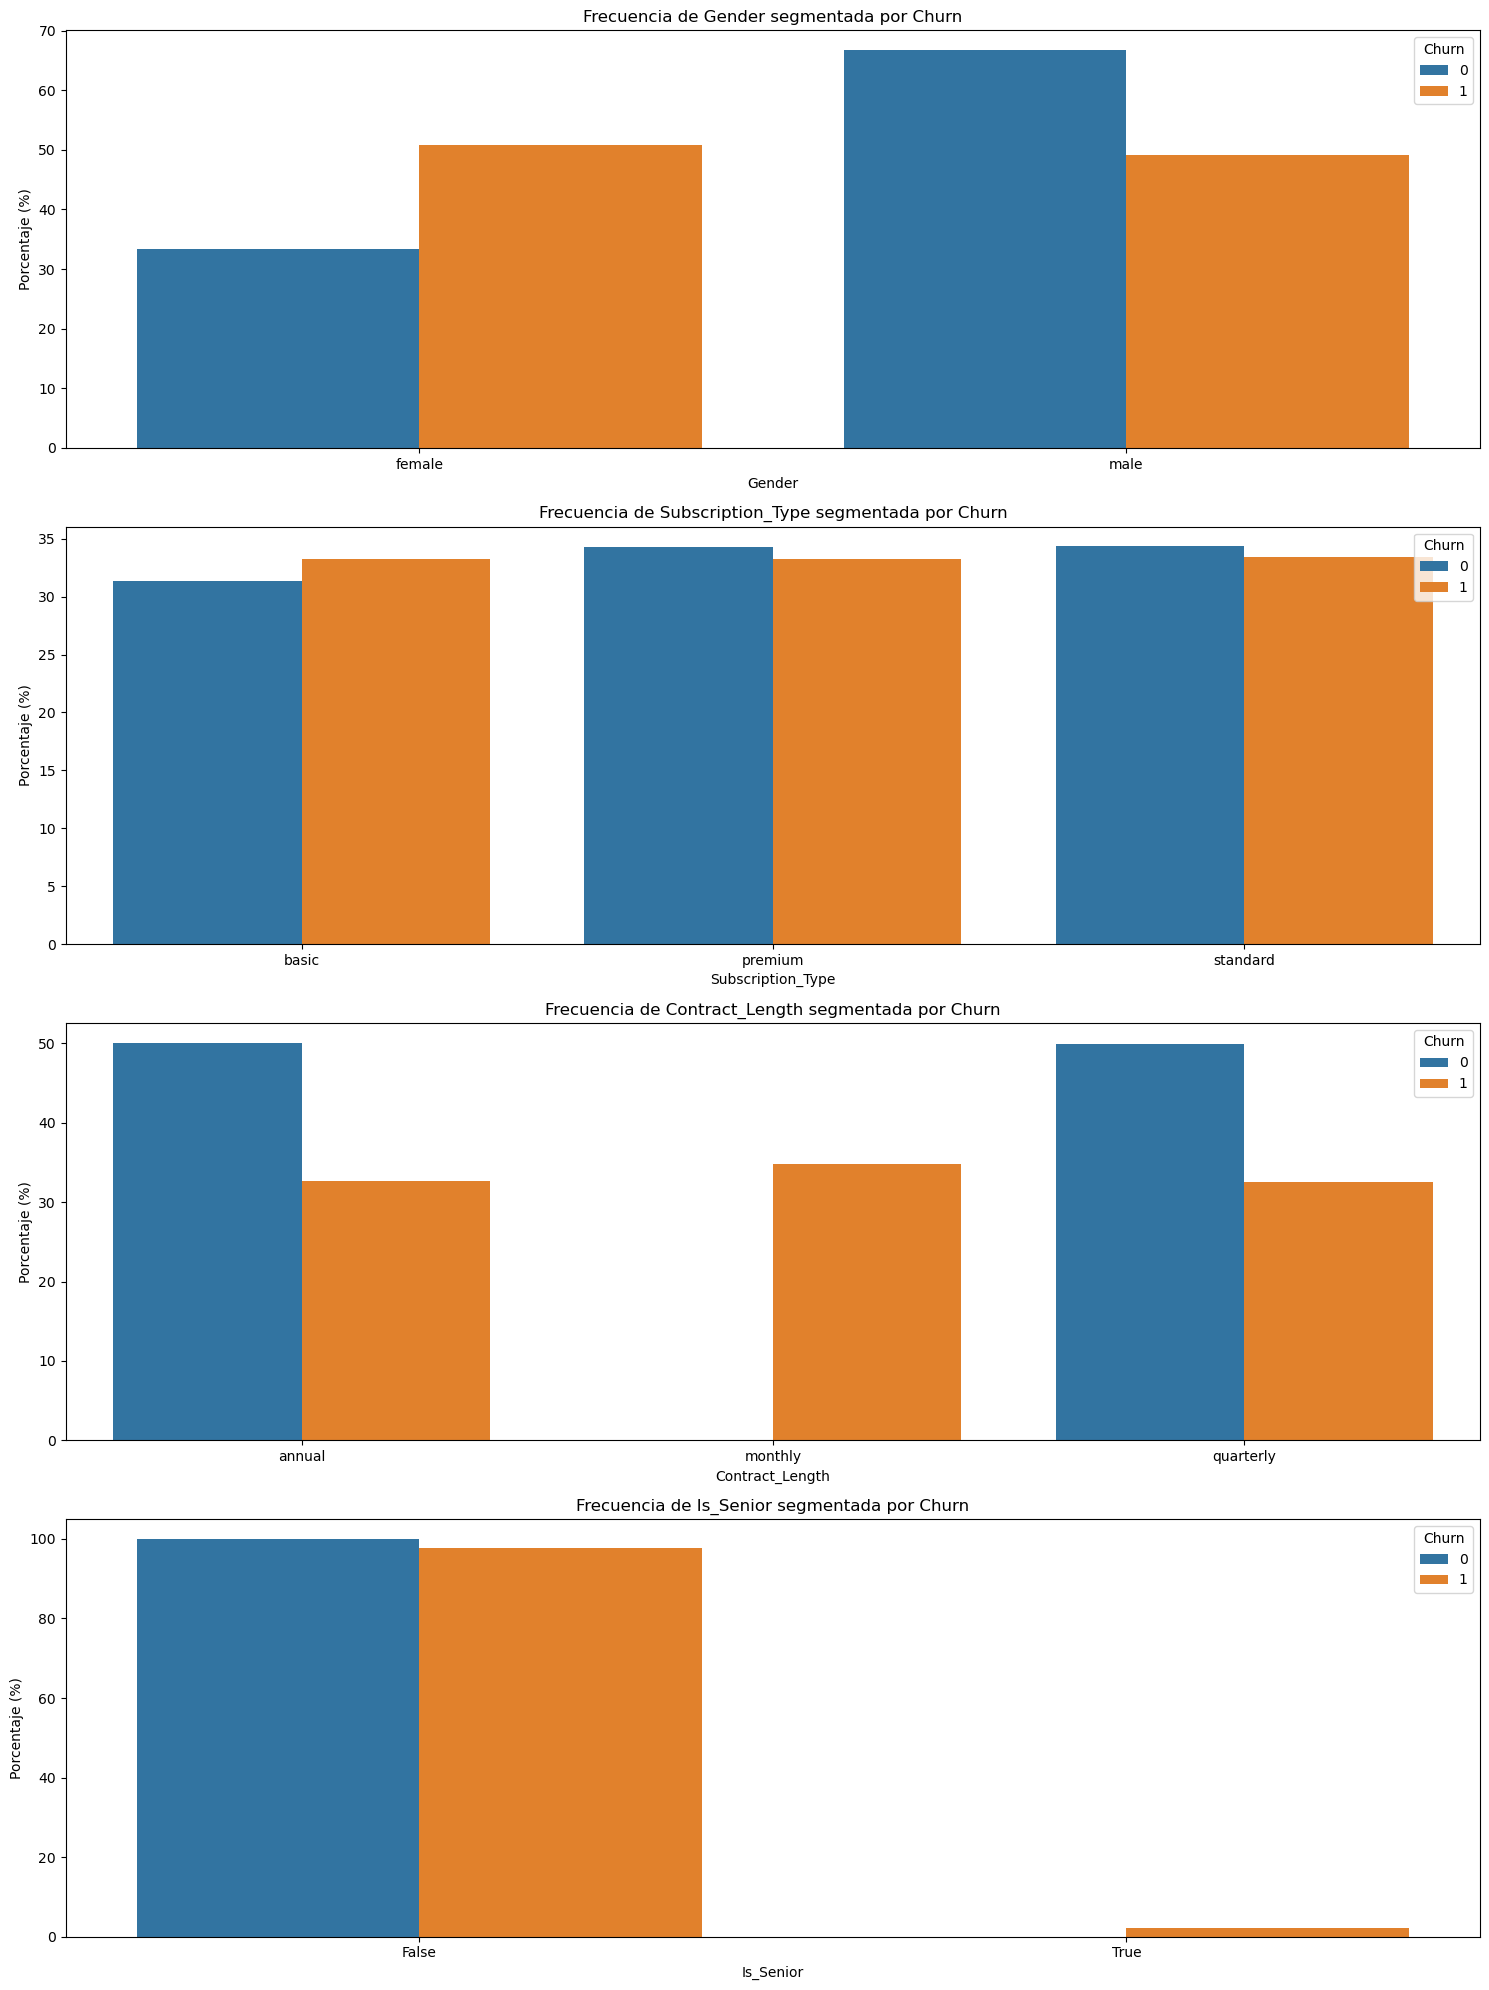

In [39]:
# Identificar columnas categóricas y booleanas
cat_bool_columns= df.select_dtypes(include=['category',bool]).columns
# Configurar el tamaño general del gráfico
plt.figure(figsize=(15, 5 * len(cat_bool_columns)))

# Crear gráficos de barras para cada variable categórica/booleana segmentada por 'Churn'
for i, col in enumerate(cat_bool_columns, 1):
    plt.subplot(len(cat_bool_columns), 1, i)
    # Calcular la frecuencia relativa en porcentaje
    churn_counts = df.groupby('Churn')[col].value_counts(normalize=True).mul(100).rename('percentage').reset_index()
    # Crear gráfico de barras
    sns.barplot(x=col, y='percentage', hue='Churn', data=churn_counts)
    plt.title(f'Frecuencia de {col} segmentada por Churn')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### Visualización 3: Correlaciones

**Hipótesis planteadas**

* La antiguedad de los clientes es inversamente proporcional a la probabilidad de fuga, luego de cierto umbral

* Hay colinealidad entre las variables numéricas


**Análisis descriptivo que lo sustenta**

* Podemos ver una relación lineal inversa entre antiguedad de los clientes y fuga, aunque no es fuerte, debe ser considerada

* Las relaciones lineales de cobros mensuales y cargos totales son débiles, lo cual no implica que no existan pero si que no son exclusivamente lineales

* Existe correlación lineal fuerte entre cargos totales y antiguedad de los clientes, como era esperable

* Existe correlación lineal media entre cargos totales y cargos mensuales, esto es algo que se debe investigar

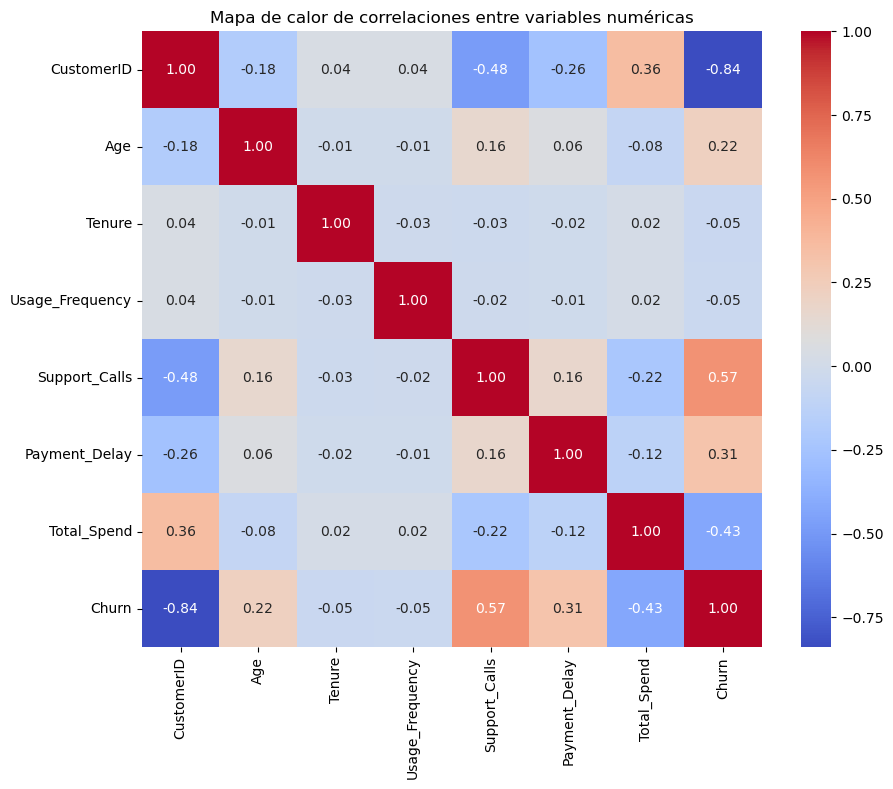

In [40]:
correlation_matrix = df[numerical_columns].corr()

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de calor de correlaciones entre variables numéricas')
plt.show()

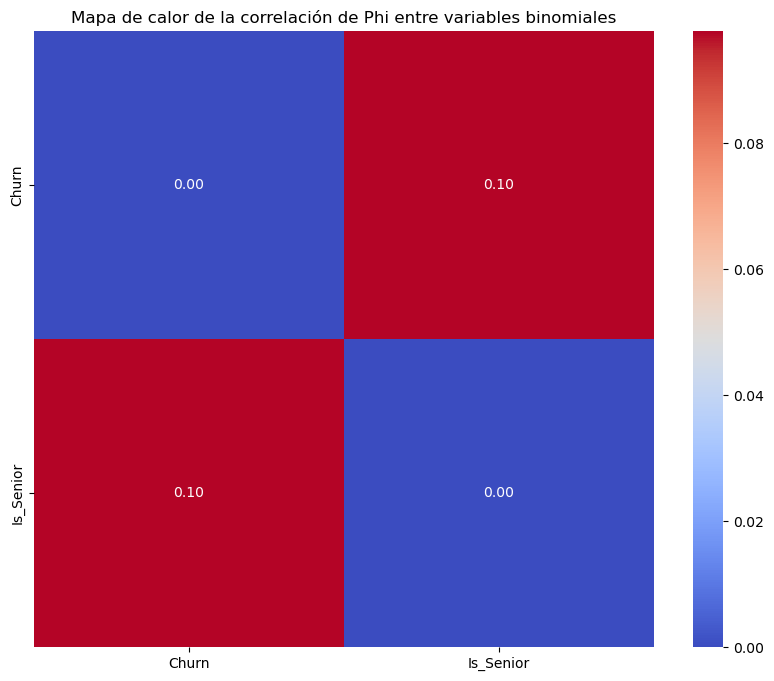

In [41]:
# Filtrar columnas binomiales (con valores 0 y 1)
binomial_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == [0, 1]]
# Inicializar la matriz de correlación de Phi
phi_corr_matrix = pd.DataFrame(np.zeros((len(binomial_columns), len(binomial_columns))), 
                               index=binomial_columns, columns=binomial_columns)
# Calcular la correlación de Phi para cada par de variables
for col1 in binomial_columns:
    for col2 in binomial_columns:
        if col1 != col2:
            # Crear una tabla de contingencia
            contingency_table = pd.crosstab(df[col1], df[col2])
            # Calcular el estadístico Chi-cuadrado y extraer el valor Phi
            chi2, _, _, _ = chi2_contingency(contingency_table)
            phi = np.sqrt(chi2 / df.shape[0])
            phi_corr_matrix.loc[col1, col2] = phi
# Graficar el mapa de calor de la matriz de correlación de Phi
plt.figure(figsize=(10, 8))
sns.heatmap(phi_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Mapa de calor de la correlación de Phi entre variables binomiales')
plt.show()

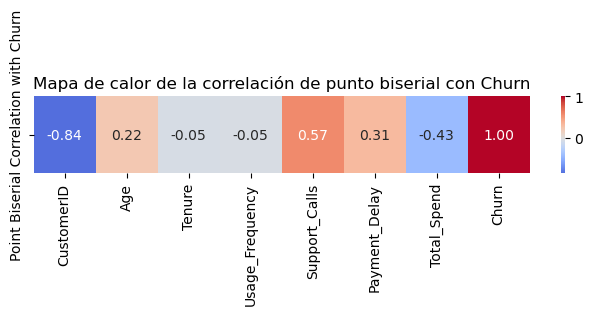

In [42]:
from scipy.stats import pointbiserialr
# Calcular la correlación de punto biserial entre Churn y las variables numéricas
churn_corr = {col: pointbiserialr(df['Churn'], df[col])[0] for col in numerical_columns}
# Convertir el diccionario a un DataFrame para facilitar la visualización
churn_corr_df = pd.DataFrame.from_dict(churn_corr, orient='index', columns=['Point Biserial Correlation with Churn'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(8, 1))
sns.heatmap(churn_corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con Churn')
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 440832 entries, 0 to 440832
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         440832 non-null  int32         
 1   Age                440832 non-null  int32         
 2   Gender             440832 non-null  category      
 3   Tenure             440832 non-null  int32         
 4   Usage_Frequency    440832 non-null  int32         
 5   Support_Calls      440832 non-null  int32         
 6   Payment_Delay      440832 non-null  float64       
 7   Subscription_Type  440832 non-null  category      
 8   Contract_Length    440832 non-null  category      
 9   Total_Spend        440832 non-null  float64       
 10  Last_Interaction   440832 non-null  datetime64[ns]
 11  Churn              440832 non-null  int32         
 12  Is_Senior          440832 non-null  bool          
dtypes: bool(1), category(3), datetime64[ns](1), float

## **Implementación de Modelos:**

**Modelos de Clasificación:** Implementa modelos de SVM y XGBoost.

In [44]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

In [45]:
# Importación de librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# 1. Codificación de las variables categóricas usando pd.get_dummies
df = pd.get_dummies(df, columns=['Gender', 'Subscription_Type', 'Contract_Length'], drop_first=True)

# 2. Conversión de la columna booleana (Is_Senior) a entero de manera eficiente
df['Is_Senior'] = df['Is_Senior'].astype('int8')

# 3. Extracción de características de la columna 'Last_Interaction'
df['Last_Interaction'] = pd.to_datetime(df['Last_Interaction'])
df['Last_Interaction_month'] = df['Last_Interaction'].dt.month.astype('int8')
df['Last_Interaction_day'] = df['Last_Interaction'].dt.day.astype('int8')
df['Last_Interaction_weekday'] = df['Last_Interaction'].dt.weekday.astype('int8')

# Eliminamos la columna original de fecha
df.drop(columns=['Last_Interaction'], inplace=True)

# 4. Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['Churn', 'CustomerID'])  # Excluimos 'Churn' que es la etiqueta y 'CustomerID' que no es relevante
y = df['Churn']

# 5. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Escalado de las características (importante para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Modelo 1: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)

# Entrenar con una muestra más pequeña si el tiempo sigue siendo un problema
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_scaled, y_train, test_size=0.9, random_state=42)
svm_model.fit(X_train_sample, y_train_sample)

# Predicciones para SVM
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluación del modelo SVM
print("Evaluación del modelo SVM:")
print("Precisión:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

# 8. Modelo 2: XGBoost (sin escalado de características)
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1, max_depth=6, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predicciones para XGBoost
xgb_predictions = xgb_model.predict(X_test)

# Evaluación del modelo XGBoost
print("Evaluación del modelo XGBoost:")
print("Precisión:", accuracy_score(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))


Evaluación del modelo SVM:
Precisión: 0.894200778068892
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     38063
           1       0.94      0.87      0.90     50104

    accuracy                           0.89     88167
   macro avg       0.89      0.90      0.89     88167
weighted avg       0.90      0.89      0.89     88167

Evaluación del modelo XGBoost:
Precisión: 0.9913119421098597
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     38063
           1       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



Dimensiones de y_test: (88167,)
Dimensiones de svm_predictions: (88167,)
Dimensiones de xgb_predictions: (88167,)
Dimensiones después de predecir: (88167,), (88167,)


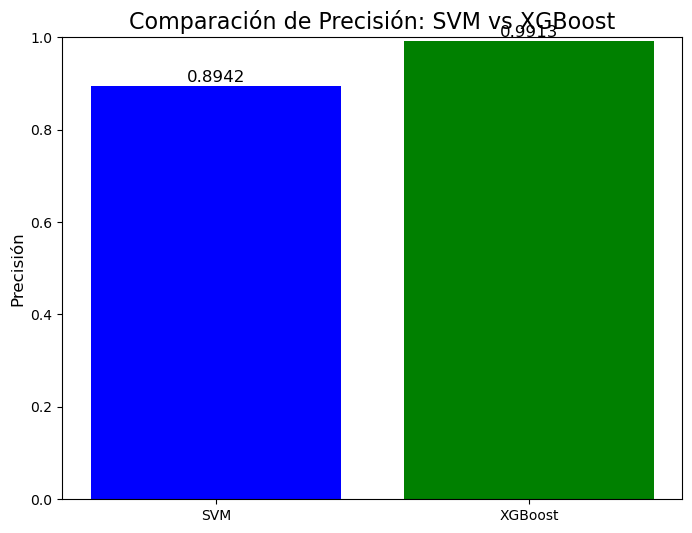

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Verificación de las dimensiones
print(f"Dimensiones de y_test: {y_test.shape}")
print(f"Dimensiones de svm_predictions: {svm_predictions.shape}")
print(f"Dimensiones de xgb_predictions: {xgb_predictions.shape}")

# Asegurándonos de que las predicciones sean sobre X_test
svm_predictions = svm_model.predict(X_test_scaled)  # Reajustamos para asegurar el tamaño correcto
xgb_predictions = xgb_model.predict(X_test)  # Reajustamos para asegurar el tamaño correcto

# Verificar nuevamente las dimensiones
print(f"Dimensiones después de predecir: {svm_predictions.shape}, {xgb_predictions.shape}")

# Calcular la precisión de manera segura
svm_accuracy = accuracy_score(y_test, svm_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['SVM', 'XGBoost'], [svm_accuracy, xgb_accuracy], color=['blue', 'green'])

# Título del gráfico
plt.title('Comparación de Precisión: SVM vs XGBoost', fontsize=16)

# Etiqueta del eje Y
plt.ylabel('Precisión', fontsize=12)

# Limitar el eje Y de 0 a 1 (precisión)
plt.ylim([0, 1])

# Mostrar las precisiones sobre las barras
for i, v in enumerate([svm_accuracy, xgb_accuracy]):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

# Mostrar el gráfico
plt.show()


**Optimización de Modelos:** Utiliza RandomizedSearchCV para optimizar los hiperparámetros de los modelos.

 * **Cambie SVM por AdaBoost**

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# 1. Reducción del conjunto de datos a 100,000 registros (estratificado por la variable objetivo 'Churn')
df_sampled, _ = train_test_split(
    df, 
    test_size=(1 - 100000 / len(df)),  # Calcula la proporción
    stratify=df['Churn'],  # Estratifica según la columna 'Churn'
    random_state=42
)

# Comprobamos el tamaño de la muestra
print("Tamaño del conjunto de datos reducido:", len(df_sampled))

# 2. Preprocesamiento (definir X e y)
X = df_sampled.drop(columns=['Churn', 'CustomerID'])  # Excluye las columnas no relevantes
y = df_sampled['Churn']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Optimización y evaluación para AdaBoost
adaboost_param_dist = {
    'n_estimators': [50, 100, 150],  # Número de clasificadores débiles
    'learning_rate': [0.01, 0.1, 1, 10]  # Tasa de aprendizaje
}

adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_search = RandomizedSearchCV(adaboost_model, adaboost_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
adaboost_search.fit(X_train_scaled, y_train)

print("Mejor modelo AdaBoost:", adaboost_search.best_params_)
adaboost_predictions = adaboost_search.predict(X_test_scaled)

print("Evaluación del modelo AdaBoost:")
print("Precisión:", accuracy_score(y_test, adaboost_predictions))
print(classification_report(y_test, adaboost_predictions))

# 6. Optimización y evaluación para XGBoost
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb_model, xgb_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
xgb_search.fit(X_train, y_train)

print("Mejor modelo XGBoost:", xgb_search.best_params_)
xgb_predictions = xgb_search.predict(X_test)
print("Evaluación del modelo XGBoost:")
print("Precisión:", accuracy_score(y_test, xgb_predictions))
print(classification_report(y_test, xgb_predictions))

# 7. Optimización y evaluación para Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)

print("Mejor modelo Random Forest:", rf_search.best_params_)
rf_predictions = rf_search.predict(X_test)
print("Evaluación del modelo Random Forest:")
print("Precisión:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# 8. Optimización y evaluación para Logistic Regression
logreg_param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # Eliminar 'none' y usar solo 'l2'
    'solver': ['lbfgs', 'saga']
}
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_search = RandomizedSearchCV(logreg_model, logreg_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
logreg_search.fit(X_train_scaled, y_train)

print("Mejor modelo Logistic Regression:", logreg_search.best_params_)
logreg_predictions = logreg_search.predict(X_test_scaled)
print("Evaluación del modelo Logistic Regression:")
print("Precisión:", accuracy_score(y_test, logreg_predictions))
print(classification_report(y_test, logreg_predictions))

# 9. Optimización y evaluación para KNN
knn_param_dist = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Distancia de Manhattan (p=1) o Euclidiana (p=2)
}
knn_model = KNeighborsClassifier()
knn_search = RandomizedSearchCV(knn_model, knn_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
knn_search.fit(X_train_scaled, y_train)

print("Mejor modelo KNN:", knn_search.best_params_)
knn_predictions = knn_search.predict(X_test_scaled)
print("Evaluación del modelo KNN:")
print("Precisión:", accuracy_score(y_test, knn_predictions))
print(classification_report(y_test, knn_predictions))


Tamaño del conjunto de datos reducido: 100000


c:\Users\user\miniconda3\envs\bootcamp_mitic\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Mejor modelo AdaBoost: {'n_estimators': 150, 'learning_rate': 1}
Evaluación del modelo AdaBoost:
Precisión: 0.98045
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8658
           1       1.00      0.97      0.98     11342

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000

Mejor modelo XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Evaluación del modelo XGBoost:
Precisión: 0.99125
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8658
           1       1.00      0.98      0.99     11342

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

Mejor modelo Random Forest: {'n_estimator

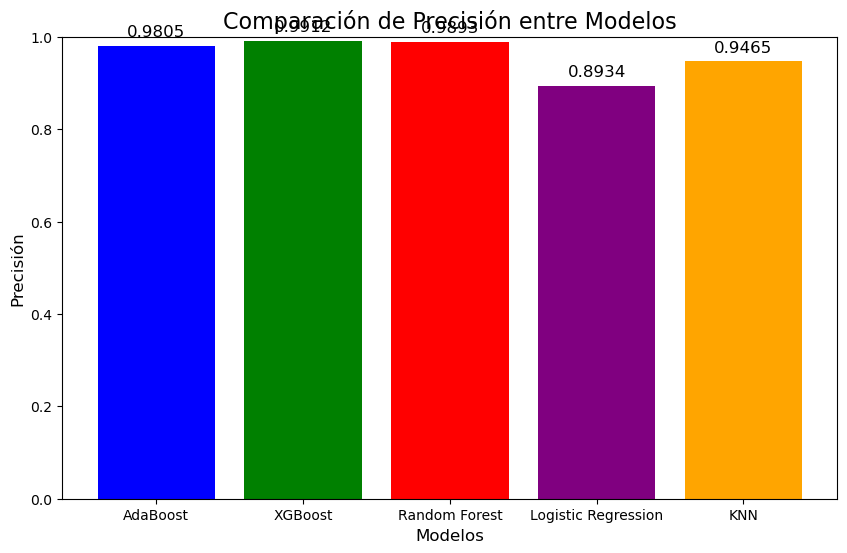

Comparación de predicciones y valores reales:
    Real Values  AdaBoost Predictions  XGBoost Predictions  \
0             1                     1                    1   
1             0                     0                    0   
2             0                     0                    0   
3             0                     0                    0   
4             0                     0                    0   
5             0                     0                    0   
6             0                     0                    0   
7             0                     0                    0   
8             0                     0                    0   
9             0                     0                    0   
10            0                     0                    0   
11            1                     1                    1   
12            1                     1                    1   
13            1                     1                    1   
14            1         

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Comparar las predicciones con los valores reales
# Accuracies of each model
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Crear un gráfico de barras para comparar los resultados
models = ['AdaBoost', 'XGBoost', 'Random Forest', 'Logistic Regression', 'KNN']
accuracies = [adaboost_accuracy, xgb_accuracy, rf_accuracy, logreg_accuracy, knn_accuracy]

# Gráfico de comparación de precisión
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])

# Título y etiquetas
plt.title('Comparación de Precisión entre Modelos', fontsize=16)
plt.xlabel('Modelos', fontsize=12)
plt.ylabel('Precisión', fontsize=12)
plt.ylim([0, 1])

# Mostrar la precisión sobre las barras
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12)

# Mostrar gráfico
plt.show()

# Comparar predicciones con valores reales
print("Comparación de predicciones y valores reales:")

# Mostrar las primeras filas de valores reales vs. predicciones de cada modelo
comparison_df = pd.DataFrame({
    'Real Values': y_test.head(20).values,  # Muestra solo los primeros 20 valores reales
    'AdaBoost Predictions': adaboost_predictions[:20],
    'XGBoost Predictions': xgb_predictions[:20],
    'Random Forest Predictions': rf_predictions[:20],
    'Logistic Regression Predictions': logreg_predictions[:20],
    'KNN Predictions': knn_predictions[:20]
})

print(comparison_df)


* **Eevalúa el rendimiento** de varios modelos de clasificación (AdaBoost, XGBoost, Random Forest, Logistic Regression y KNN) utilizando métricas como precisión, recall, F1-score y ROC-AUC. Además, genera y muestra la curva ROC para cada modelo, visualizando la tasa de verdaderos positivos frente a la tasa de falsos positivos.

Evaluación del modelo AdaBoost:
Precisión: 0.98045
Precision: 0.9963738554981416
Recall: 0.9690530770587198
F1-Score: 0.9825235775264828
ROC-AUC: 0.9822165362193576
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8658
           1       1.00      0.97      0.98     11342

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



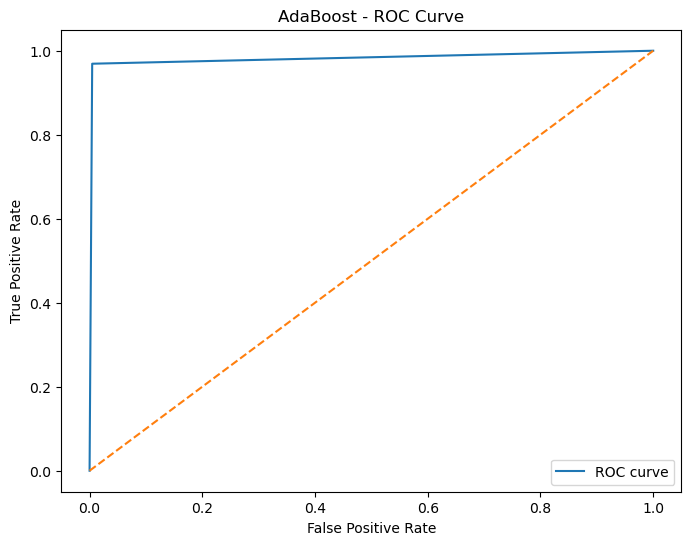

Evaluación del modelo XGBoost:
Precisión: 0.99125
Precision: 1.0
Recall: 0.9845706224651737
F1-Score: 0.9922253320893865
ROC-AUC: 0.9922853112325869
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8658
           1       1.00      0.98      0.99     11342

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



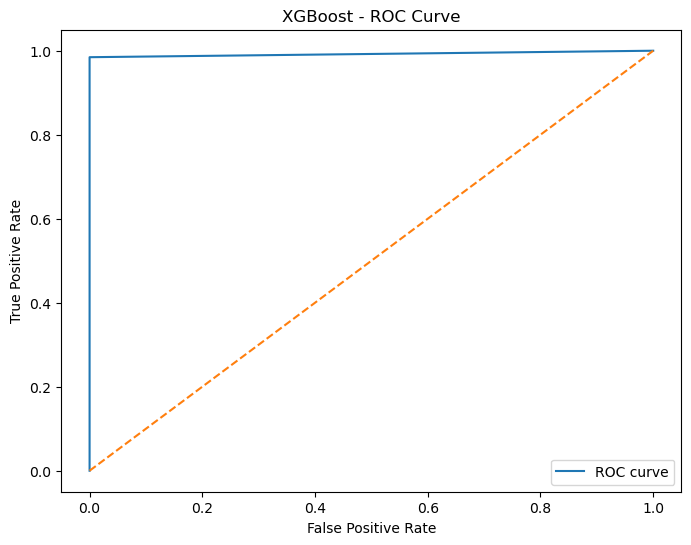

Evaluación del modelo Random Forest:
Precisión: 0.9893
Precision: 1.0
Recall: 0.9811320754716981
F1-Score: 0.9904761904761905
ROC-AUC: 0.9905660377358491
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8658
           1       1.00      0.98      0.99     11342

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



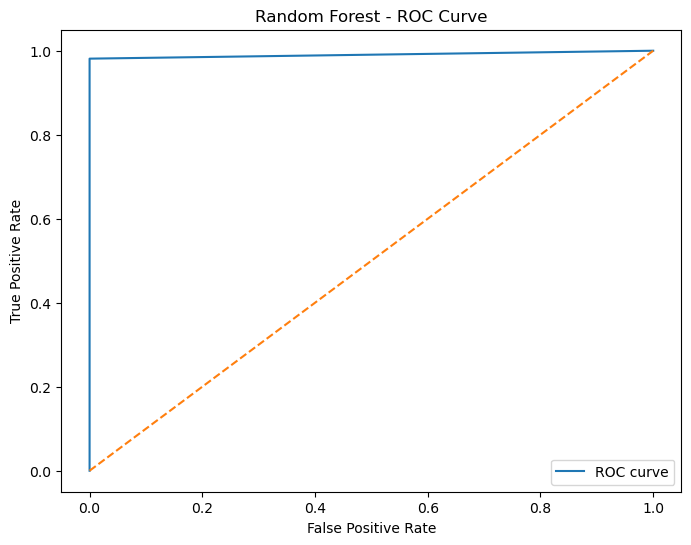

Evaluación del modelo Logistic Regression:
Precisión: 0.89345
Precision: 0.922639258511517
Recall: 0.8864397813436784
F1-Score: 0.9041773461036917
ROC-AUC: 0.8945365919885405
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      8658
           1       0.92      0.89      0.90     11342

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



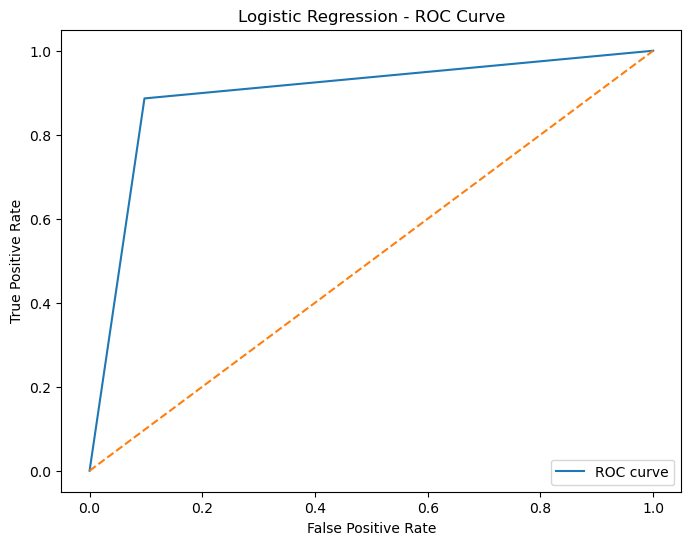

Evaluación del modelo KNN:
Precisión: 0.9465
Precision: 0.9875640782228973
Recall: 0.9172103685417035
F1-Score: 0.9510879502651307
ROC-AUC: 0.9510399267055942
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8658
           1       0.99      0.92      0.95     11342

    accuracy                           0.95     20000
   macro avg       0.94      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



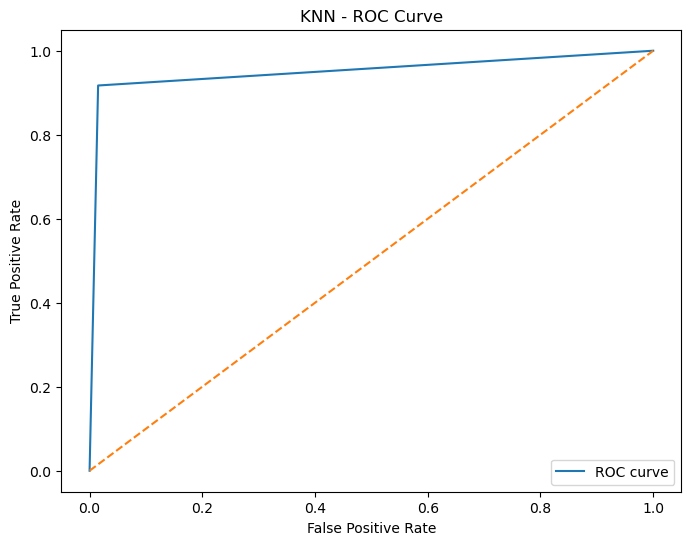

In [49]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Función para evaluar los modelos
def evaluar_modelo(y_true, y_pred, modelo_name):
    print(f"Evaluación del modelo {modelo_name}:")
    print("Precisión:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{modelo_name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Evaluación para AdaBoost
adaboost_predictions = adaboost_search.predict(X_test_scaled)
evaluar_modelo(y_test, adaboost_predictions, "AdaBoost")

# Evaluación para XGBoost
xgb_predictions = xgb_search.predict(X_test)
evaluar_modelo(y_test, xgb_predictions, "XGBoost")

# Evaluación para Random Forest
rf_predictions = rf_search.predict(X_test)
evaluar_modelo(y_test, rf_predictions, "Random Forest")

# Evaluación para Logistic Regression
logreg_predictions = logreg_search.predict(X_test_scaled)
evaluar_modelo(y_test, logreg_predictions, "Logistic Regression")

# Evaluación para KNN
knn_predictions = knn_search.predict(X_test_scaled)
evaluar_modelo(y_test, knn_predictions, "KNN")


                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
AdaBoost              0.98045   0.996374  0.969053  0.982524  0.982217
XGBoost               0.99125   1.000000  0.984571  0.992225  0.992285
Random Forest         0.98930   1.000000  0.981132  0.990476  0.990566
Logistic Regression   0.89345   0.922639  0.886440  0.904177  0.894537
KNN                   0.94650   0.987564  0.917210  0.951088  0.951040


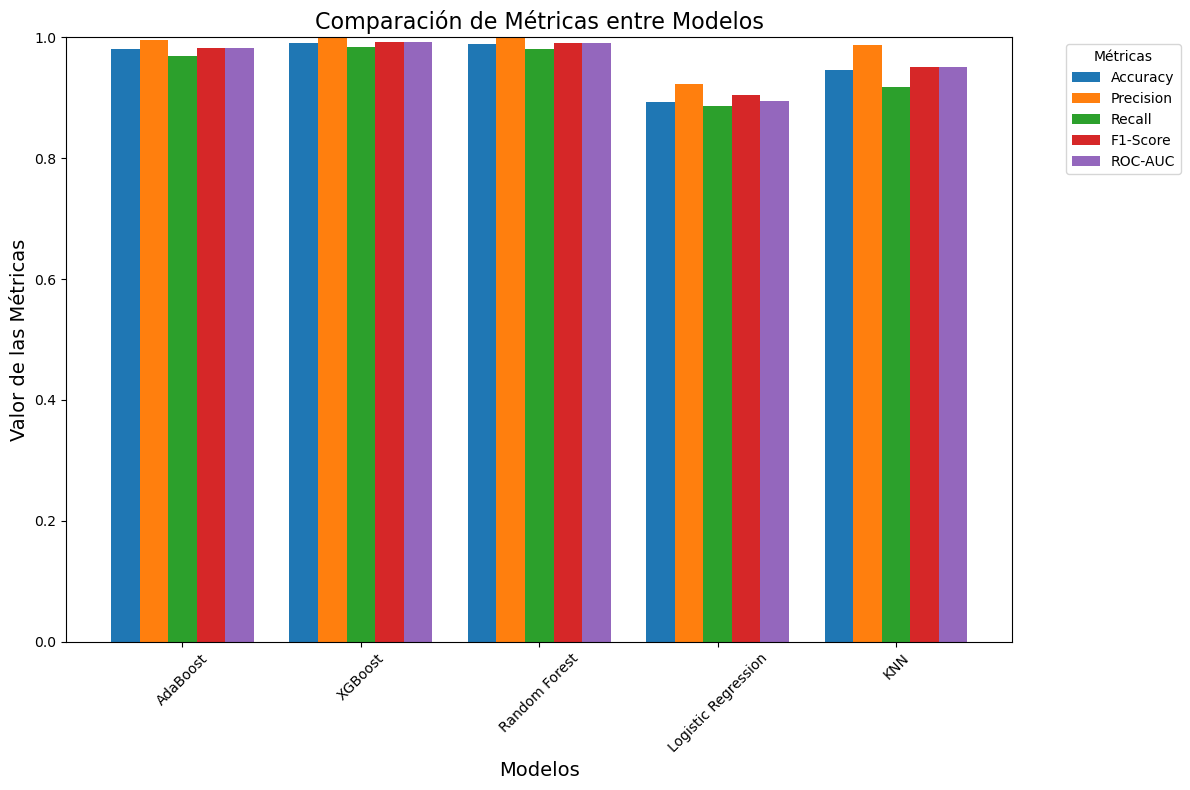

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Función para evaluar los modelos y almacenar las métricas
def evaluar_modelo_comparativo(y_true, y_pred, modelo_name, metrics_dict):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    # Guardar las métricas en el diccionario
    metrics_dict[modelo_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }

# Diccionario para almacenar las métricas de los modelos
metrics_dict = {}

# Evaluar modelos y almacenar sus métricas
adaboost_predictions = adaboost_search.predict(X_test_scaled)
evaluar_modelo_comparativo(y_test, adaboost_predictions, "AdaBoost", metrics_dict)

xgb_predictions = xgb_search.predict(X_test)
evaluar_modelo_comparativo(y_test, xgb_predictions, "XGBoost", metrics_dict)

rf_predictions = rf_search.predict(X_test)
evaluar_modelo_comparativo(y_test, rf_predictions, "Random Forest", metrics_dict)

logreg_predictions = logreg_search.predict(X_test_scaled)
evaluar_modelo_comparativo(y_test, logreg_predictions, "Logistic Regression", metrics_dict)

knn_predictions = knn_search.predict(X_test_scaled)
evaluar_modelo_comparativo(y_test, knn_predictions, "KNN", metrics_dict)

# Convertir el diccionario a un DataFrame para facilitar la visualización
import pandas as pd
metrics_df = pd.DataFrame(metrics_dict).T

# Mostrar el DataFrame con las métricas
print(metrics_df)

# Crear un gráfico de barras comparando las métricas
metrics_df.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Comparación de Métricas entre Modelos', fontsize=16)
plt.xlabel('Modelos', fontsize=14)
plt.ylabel('Valor de las Métricas', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Para que todas las métricas estén normalizadas entre 0 y 1
plt.legend(title="Métricas", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Observacion**

* XGBoost y Random Forest son los modelos con el mejor desempeño general, alcanzando altas puntuaciones en todas las métricas, especialmente en Accuracy, Precision y ROC-AUC, lo que indica que son muy buenos para predecir correctamente tanto las clases positivas como negativas.

* AdaBoost también tiene un rendimiento excelente, aunque ligeramente inferior a XGBoost y Random Forest, con un buen equilibrio en todas las métricas.

* Logistic Regression, por otro lado, tiene un desempeño más bajo, especialmente en Accuracy y ROC-AUC, lo que sugiere que podría ser menos efectivo para este conjunto de datos.

* KNN tiene una puntuación sólida en Accuracy y F1-Score, pero su Precision y Recall son algo más bajos en comparación con los modelos más complejos como XGBoost y Random Forest.

En general, los modelos basados en árboles como XGBoost y Random Forest parecen ser los más efectivos en esta tarea, mientras que Logistic Regression se muestra menos competitivo.

## **Evaluación de Modelos:** 
* Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.

* Este proceso evalúa varios modelos de clasificación utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC. Primero, se realiza una selección estratificada de una muestra del conjunto de datos y se divide en conjuntos de entrenamiento y prueba. Los modelos, como AdaBoost, XGBoost, Random Forest, Logistic Regression y KNN, se **optimizan** mediante búsqueda aleatoria de hiperparámetros. A continuación, se calcula el rendimiento de cada modelo con las métricas mencionadas y se compara su desempeño. Finalmente, se presentan las curvas ROC de todos los modelos en una gráfica para evaluar cuál es el más efectivo en la tarea de clasificación.

Tamaño del conjunto de datos reducido: 100000


c:\Users\user\miniconda3\envs\bootcamp_mitic\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Mejor modelo AdaBoost: {'n_estimators': 150, 'learning_rate': 1}

Evaluación del modelo AdaBoost:
Accuracy: 0.98045
Precision: 0.9963738554981416
Recall: 0.9690530770587198
F1-Score: 0.9825235775264828
ROC-AUC: 0.9945941373599635

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      8658
           1       1.00      0.97      0.98     11342

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000

Mejor modelo XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}

Evaluación del modelo XGBoost:
Accuracy: 0.99125
Precision: 1.0
Recall: 0.9845706224651737
F1-Score: 0.9922253320893865
ROC-AUC: 0.997648266119435

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      86

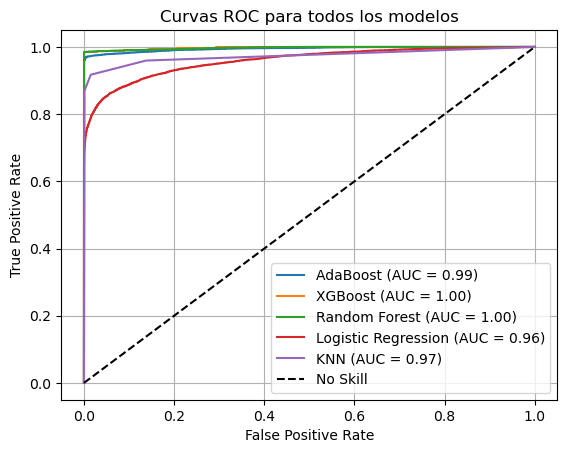

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
import xgboost as xgb
import matplotlib.pyplot as plt

# 1. Reducción del conjunto de datos a 100,000 registros (estratificado por la variable objetivo 'Churn')
df_sampled, _ = train_test_split(
    df, 
    test_size=(1 - 100000 / len(df)),  # Calcula la proporción
    stratify=df['Churn'],  # Estratifica según la columna 'Churn'
    random_state=42
)

# Comprobamos el tamaño de la muestra
print("Tamaño del conjunto de datos reducido:", len(df_sampled))

# 2. Preprocesamiento (definir X e y)
X = df_sampled.drop(columns=['Churn', 'CustomerID'])  # Excluye las columnas no relevantes
y = df_sampled['Churn']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Función para calcular y mostrar las métricas
def evaluate_model(model_name, model, X_test, y_test, predictions):
    print(f"\nEvaluación del modelo {model_name}:")
    # Accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy}")
    
    # Precision
    precision = precision_score(y_test, predictions)
    print(f"Precision: {precision}")
    
    # Recall
    recall = recall_score(y_test, predictions)
    print(f"Recall: {recall}")
    
    # F1-Score
    f1 = f1_score(y_test, predictions)
    print(f"F1-Score: {f1}")
    
    # ROC-AUC
    if hasattr(model, "predict_proba"):
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    else:  # For models that do not support predict_proba
        roc_auc = roc_auc_score(y_test, model.decision_function(X_test))
    print(f"ROC-AUC: {roc_auc}")
    
    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, predictions))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc(fpr, tpr):.2f})')

# 6. Optimización y evaluación para AdaBoost
adaboost_param_dist = {
    'n_estimators': [50, 100, 150],  # Número de clasificadores débiles
    'learning_rate': [0.01, 0.1, 1, 10]  # Tasa de aprendizaje
}

adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_search = RandomizedSearchCV(adaboost_model, adaboost_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
adaboost_search.fit(X_train_scaled, y_train)

print("Mejor modelo AdaBoost:", adaboost_search.best_params_)
adaboost_predictions = adaboost_search.predict(X_test_scaled)
evaluate_model("AdaBoost", adaboost_search.best_estimator_, X_test_scaled, y_test, adaboost_predictions)

# 7. Optimización y evaluación para XGBoost
xgb_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
xgb_search = RandomizedSearchCV(xgb_model, xgb_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
xgb_search.fit(X_train, y_train)

print("Mejor modelo XGBoost:", xgb_search.best_params_)
xgb_predictions = xgb_search.predict(X_test)
evaluate_model("XGBoost", xgb_search.best_estimator_, X_test, y_test, xgb_predictions)

# 8. Optimización y evaluación para Random Forest
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf_model, rf_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)

print("Mejor modelo Random Forest:", rf_search.best_params_)
rf_predictions = rf_search.predict(X_test)
evaluate_model("Random Forest", rf_search.best_estimator_, X_test, y_test, rf_predictions)

# 9. Optimización y evaluación para Logistic Regression
logreg_param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # Eliminar 'none' y usar solo 'l2'
    'solver': ['lbfgs', 'saga']
}
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_search = RandomizedSearchCV(logreg_model, logreg_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
logreg_search.fit(X_train_scaled, y_train)

print("Mejor modelo Logistic Regression:", logreg_search.best_params_)
logreg_predictions = logreg_search.predict(X_test_scaled)
evaluate_model("Logistic Regression", logreg_search.best_estimator_, X_test_scaled, y_test, logreg_predictions)

# 10. Optimización y evaluación para KNN
knn_param_dist = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Distancia de Manhattan (p=1) o Euclidiana (p=2)
}
knn_model = KNeighborsClassifier()
knn_search = RandomizedSearchCV(knn_model, knn_param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1)
knn_search.fit(X_train_scaled, y_train)

print("Mejor modelo KNN:", knn_search.best_params_)
knn_predictions = knn_search.predict(X_test_scaled)
evaluate_model("KNN", knn_search.best_estimator_, X_test_scaled, y_test, knn_predictions)

# 11. Mostrar la curva ROC de todos los modelos
plt.plot([0, 1], [0, 1], 'k--', label="No Skill")
plt.title("Curvas ROC para todos los modelos")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid()
plt.show()


**Observacion**
* El gráfico muestra las curvas ROC de varios modelos de clasificación (AdaBoost, XGBoost, Random Forest, Logistic Regression y KNN), con sus respectivos valores de AUC (Area Under the Curve). Un AUC cercano a 1 indica un buen rendimiento del modelo, mientras que una línea diagonal (representando "No Skill") indica un modelo sin capacidad para discriminar entre clases. XGBoost y Random Forest tienen el mejor desempeño con un AUC de 1.00, mientras que los demás modelos también muestran buenos resultados, pero ligeramente inferiores.

>
* **Métricas de evaluación:** Al final, cada modelo es evaluado en términos de precisión, precisión (precision), recall, F1-score y AUC-ROC, lo que proporciona una visión detallada de su rendimiento.
* **Reporte de clasificación:** Además de las métricas, se imprime un reporte detallado que incluye la matriz de confusión y otras métricas útiles.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score
import xgboost as xgb

# 1. Reducción del conjunto de datos a 100,000 registros (estratificado por la variable objetivo 'Churn')
df_sampled, _ = train_test_split(
    df, 
    test_size=(1 - 100000 / len(df)),  # Calcula la proporción
    stratify=df['Churn'],  # Estratifica según la columna 'Churn'
    random_state=42
)

# Comprobamos el tamaño de la muestra
print("Tamaño del conjunto de datos reducido:", len(df_sampled))

# 2. Preprocesamiento (definir X e y)
X = df_sampled.drop(columns=['Churn', 'CustomerID'])  # Excluye las columnas no relevantes
y = df_sampled['Churn']

# 3. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4. Escalado de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función para evaluar un modelo
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC para clasificación binaria
    
    print(f"Evaluación del modelo {model.__class__.__name__}:")
    print(f"  Precisión: {accuracy:.4f}")
    print(f"  Precisión (Precision): {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {auc:.4f}")
    print(classification_report(y_test, y_pred))

# 5. Evaluación para AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)
evaluate_model(adaboost_model, X_train_scaled, X_test_scaled, y_train, y_test)

# 6. Evaluación para XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

# 7. Evaluación para Random Forest
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# 8. Evaluación para Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
evaluate_model(logreg_model, X_train_scaled, X_test_scaled, y_train, y_test)

# 9. Evaluación para KNN
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test)


Tamaño del conjunto de datos reducido: 100000


c:\Users\user\miniconda3\envs\bootcamp_mitic\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluación del modelo AdaBoostClassifier:
  Precisión: 0.9809
  Precisión (Precision): 0.9970
  Recall: 0.9692
  F1-Score: 0.9829
  AUC-ROC: 0.9945
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8658
           1       1.00      0.97      0.98     11342

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000

Evaluación del modelo XGBClassifier:
  Precisión: 0.9912
  Precisión (Precision): 0.9997
  Recall: 0.9848
  F1-Score: 0.9922
  AUC-ROC: 0.9975
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8658
           1       1.00      0.98      0.99     11342

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000

Evaluación del modelo RandomForestClassifier:
  Precisi

* **Métricas de evaluación:** Precisión, precisión, recall, F1-score, AUC-ROC, y el reporte de clasificación.
* **Gráfico de la matriz de confusión:** Visualiza las predicciones frente a los valores reales para cada clase en el conjunto de prueba.

c:\Users\user\miniconda3\envs\bootcamp_mitic\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Evaluación del modelo AdaBoostClassifier:
  Precisión: 0.9809
  Precisión (Precision): 0.9970
  Recall: 0.9692
  F1-Score: 0.9829
  AUC-ROC: 0.9945
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8658
           1       1.00      0.97      0.98     11342

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



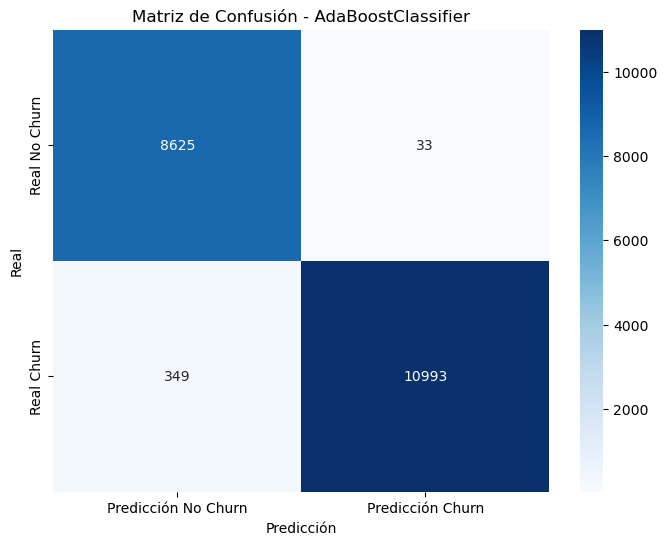

Evaluación del modelo XGBClassifier:
  Precisión: 0.9912
  Precisión (Precision): 0.9997
  Recall: 0.9848
  F1-Score: 0.9922
  AUC-ROC: 0.9975
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8658
           1       1.00      0.98      0.99     11342

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



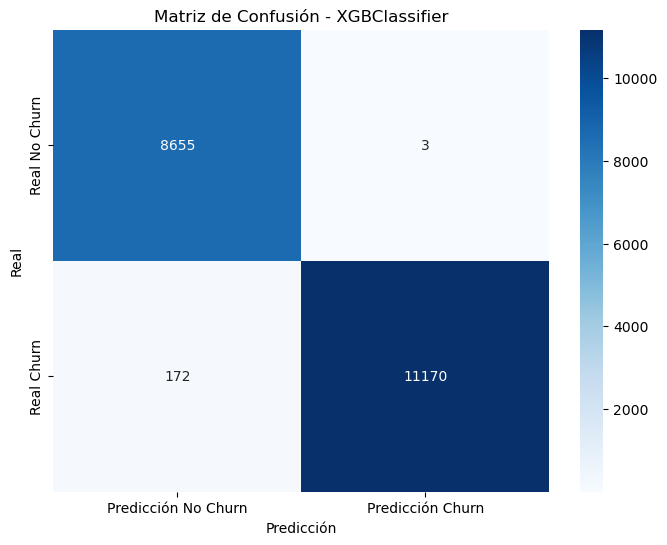

Evaluación del modelo RandomForestClassifier:
  Precisión: 0.9890
  Precisión (Precision): 1.0000
  Recall: 0.9806
  F1-Score: 0.9902
  AUC-ROC: 0.9969
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8658
           1       1.00      0.98      0.99     11342

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



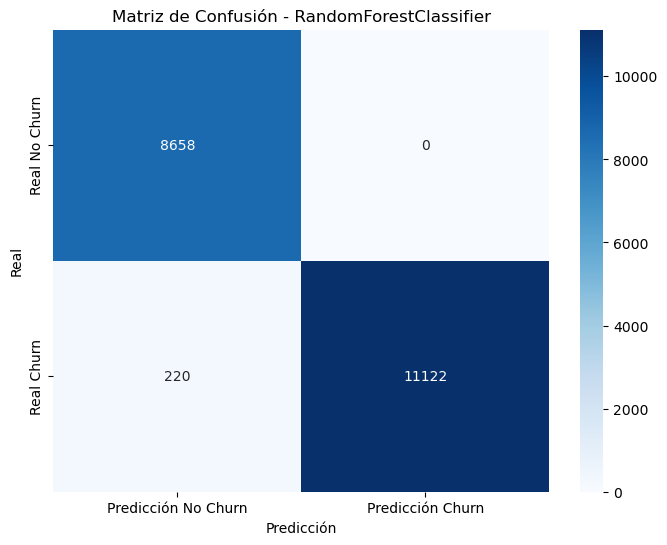

Evaluación del modelo LogisticRegression:
  Precisión: 0.8934
  Precisión (Precision): 0.9225
  Recall: 0.8865
  F1-Score: 0.9041
  AUC-ROC: 0.9586
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      8658
           1       0.92      0.89      0.90     11342

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



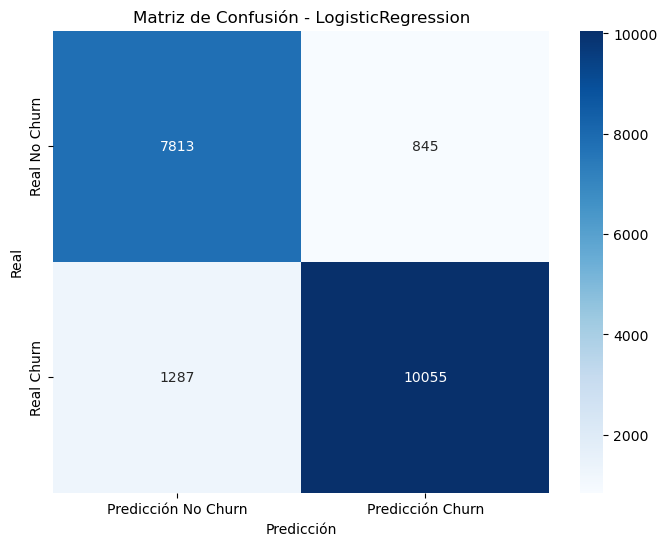

Evaluación del modelo KNeighborsClassifier:
  Precisión: 0.9453
  Precisión (Precision): 0.9919
  Recall: 0.9110
  F1-Score: 0.9497
  AUC-ROC: 0.9778
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      8658
           1       0.99      0.91      0.95     11342

    accuracy                           0.95     20000
   macro avg       0.94      0.95      0.94     20000
weighted avg       0.95      0.95      0.95     20000



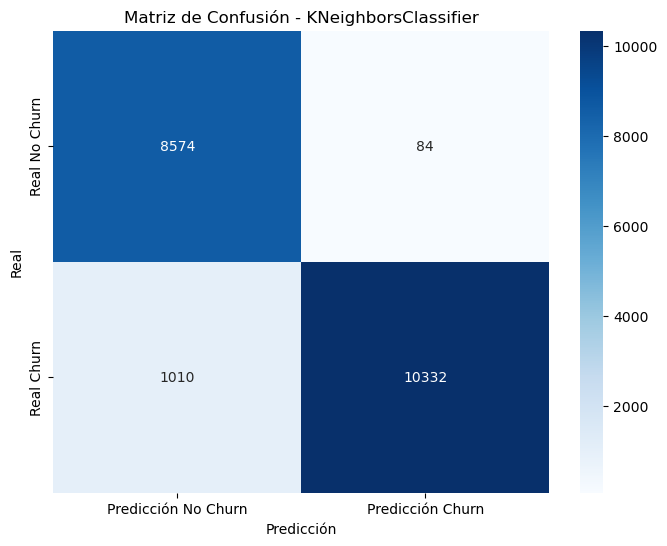

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Función para evaluar un modelo, ahora con la matriz de confusión
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC para clasificación binaria
    
    print(f"Evaluación del modelo {model.__class__.__name__}:")
    print(f"  Precisión: {accuracy:.4f}")
    print(f"  Precisión (Precision): {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  AUC-ROC: {auc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Calcular y mostrar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Graficar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicción No Churn', 'Predicción Churn'], yticklabels=['Real No Churn', 'Real Churn'])
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.title(f'Matriz de Confusión - {model.__class__.__name__}')
    plt.show()

# 5. Evaluación para AdaBoost
adaboost_model = AdaBoostClassifier(random_state=42)
evaluate_model(adaboost_model, X_train_scaled, X_test_scaled, y_train, y_test)

# 6. Evaluación para XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

# 7. Evaluación para Random Forest
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# 8. Evaluación para Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
evaluate_model(logreg_model, X_train_scaled, X_test_scaled, y_train, y_test)

# 9. Evaluación para KNN
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test)


# Resultados de Modelos de Clasificación

Se han evaluado los siguientes modelos para la predicción de la variable `Churn`. Los resultados se muestran a continuación:

## Resumen de las Métricas de Evaluación

| **Modelo**                   | **Precisión** | **Recall** | **F1-Score** | **AUC-ROC** | **Accuracy** |
|------------------------------|---------------|------------|--------------|-------------|--------------|
| **AdaBoost**                  | 0.9970        | 0.9692     | 0.9829       | 0.9945      | 0.9809       |
| **XGBoost**                   | 0.9997        | 0.9848     | 0.9922       | 0.9975      | 0.9912       |
| **Random Forest**             | 1.0000        | 0.9806     | 0.9902       | 0.9969      | 0.9890       |
| **Logistic Regression**       | 0.9225        | 0.8865     | 0.9041       | 0.9586      | 0.8934       |
| **K-Nearest Neighbors (KNN)** | 0.9919        | 0.9110     | 0.9497       | 0.9778      | 0.9453       |

## Análisis Comparativo

### 1. **Precisión**:
   - **XGBoost** tiene la mayor precisión (0.9997), seguida por **Random Forest** (1.0000) y **AdaBoost** (0.9970).
   - **Random Forest** tiene una precisión perfecta de 1.0000, lo que sugiere que no hay falsos positivos.

### 2. **Recall**:
   - **XGBoost** tiene el mejor **recall** (0.9848), seguido por **Random Forest** (0.9806).
   - El **recall** mide la capacidad del modelo para identificar correctamente los casos positivos (minimizar falsos negativos).

### 3. **F1-Score**:
   - **XGBoost** tiene el mejor **F1-Score** (0.9922), seguido por **Random Forest** (0.9902).
   - El **F1-Score** es una medida combinada de precisión y recall, lo que hace que sea ideal para situaciones de clasificación desbalanceada.

### 4. **AUC-ROC**:
   - **XGBoost** tiene el mejor **AUC-ROC** (0.9975), seguido por **AdaBoost** (0.9945).
   - Un AUC-ROC cercano a 1.0 indica un excelente desempeño en la clasificación.

### 5. **Accuracy**:
   - **XGBoost** (0.9912) y **Random Forest** (0.9890) tienen las mejores tasas de **accuracy**.
   - La **accuracy** refleja la capacidad general del modelo para hacer predicciones correctas.

## Conclusión y Recomendación

1. **XGBoost** es el modelo más adecuado para esta tarea, ya que tiene el mejor desempeño en términos de **precision**, **recall**, **F1-Score** y **AUC-ROC**.
   
2. **Random Forest** es una excelente opción con una **precision perfecta (1.0000)** y un alto **AUC-ROC**. Sin embargo, su **recall** es ligeramente inferior al de **XGBoost**.

3. **AdaBoost** tiene un buen desempeño, pero **XGBoost** y **Random Forest** le superan en varias métricas clave.

### Recomendación Final:
- **XGBoost** es la opción más equilibrada, especialmente si se necesita optimizar tanto la precisión como el recall. Es ideal para mantener una alta tasa de clasificación correcta y minimizar tanto falsos positivos como falsos negativos.
